# Appendix A

In [1]:
# Import packages 
import h5py
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import rayleigh
import matplotlib.ticker as ticker

# Define List of galaxy IDs to analyse
galaxy_ids = [10239, 10464, 11028, 11097, 11244, 11576, 11608, 11743, 11832, 11857, 
              11860, 12360, 12467, 12517, 12593, 12881, 12966, 13108, 14921, 13212, 
              13409, 13432, 13512, 13932, 14140, 17208, 14260, 14362, 14483, 14527, 
              14559, 14591, 14739, 14896, 23325, 15036, 15039, 15607, 16087, 16181, 
              16559, 16859, 20701, 17338, 17538, 17770, 18116, 18211, 18454, 18523, 
              21320, 21331, 18789, 18792, 18922, 19427, 20175, 36500, 20906, 21080, 
              21081, 21133, 21177, 21231, 40394, 40210, 21378, 21471, 21479, 21505, 
              21586, 21609, 21648, 21709, 24820, 21783, 21797, 21836, 21852, 21861, 
              22019, 22052, 22207, 24757, 22219, 22311, 22396, 22401, 22487, 22532, 
              22550, 22567, 22604, 22623, 22646, 22738, 22739, 22788, 22814, 22815, 
              22858, 22891, 23205, 23060, 23102, 23158, 23276, 23294, 23304, 23386, 
              23399, 23424, 23473, 23484, 23522, 23604, 23607, 23663, 23686, 23691, 
              23721, 23747, 23748, 23867, 23981, 24138, 24157, 25235, 25281, 25437, 
              25443, 25490, 25510, 25527, 25540, 25604, 25767, 25875, 25947, 26109, 
              26183, 26210, 26418, 26502, 24676, 26503, 26581, 26670, 26723, 26891, 
              26929, 26940, 26963, 26966, 24619, 27001, 27061, 27076, 27233, 27358, 
              27402, 27704, 39519, 38193, 27824, 27922, 28438, 28440, 28461, 28595, 
              28695, 24383, 28989, 28995, 29110, 29118, 29125, 29179, 29279, 29298, 
              29524, 29531, 29541, 29749, 30062, 30076, 30156, 30266, 30341, 30379, 
              30911, 24328, 30918, 31001, 31063, 31085, 31189, 31281, 31283, 31342, 
              23096, 24310, 31448, 31580, 31615, 31715, 31775, 31305, 36855, 37383, 
              37407, 37799, 37943, 38061, 38206, 38267, 38291, 38376, 38459, 38485, 
              38554, 38729, 38980, 39147, 39197, 39355, 39554, 39696, 39978, 40107, 
              40295, 40607, 40990, 41000, 41026, 41153, 10990, 11013, 38922, 27119, 
              26651, 24565, 23797, 21788, 12766, 21048, 20025, 13063, 13914, 15956, 
              18709, 16400, 18296, 29238, 11258, 12809, 20762, 20851, 29995, 30496, 
              37745, 38101, 24955, 22267, 24965, 25029, 25079, 25120, 25155, 25217, 
              25234]

# Fucntion to calculate Euclidean distances
def euclidean_distance(x, y):
    return np.sqrt(x**2 + y**2)

# Function to determine and store Euclidean distances for each ID. Used for Plot 1
def calculate_euclidean_distances(galaxy_ids, filters):
    
    results = []
    mean_distances = []
    
    for galaxy_id in galaxy_ids:
        
        galaxy_distances = {"Galaxy ID": galaxy_id}
        distances = []
        
        for filter_name in filters:
            
            with h5py.File(f"EGS_{galaxy_id:05d}.hdf5", "r") as f:
                
                if filter_name in f:
                    
                    centre_x, centre_y = f[f'{filter_name}'][f'{galaxy_id}']['expansion'].attrs['centre']
                    
                    distance = euclidean_distance(centre_x, centre_y)
                    
                    galaxy_distances[filter_name] = distance
                    
                    distances.append(distance)
                    
                else:
                    galaxy_distances[filter_name] = np.nan
        
        # Calculate mean distance for the current galaxy excluding nan values
        mean_distance = np.nanmean(distances)
        galaxy_distances['mean_distance'] = mean_distance
        mean_distances.append(mean_distance)
        
        results.append(galaxy_distances)
    
    # Create DataFrame table using Pandas imported above. This is useful for printing purposes also
    df = pd.DataFrame(results)
    
    return df, mean_distances

# Function to get redshift from file
def get_redshift(filename, galaxy_id):
    
    with open(filename, 'r') as file:
        
        for line in file:
            
            data = line.strip().split()
            
            if data[0] == str(galaxy_id):
                
                redshift = float(data[11])
                
                return redshift
    return None

# Function to determine and store Euclidean distances and redshifts. Used for Plot 2
def calculate_distances_and_redshifts(galaxy_ids, filters, redshift_filename):
    
    results = []
    mean_distances = []
    
    for galaxy_id in galaxy_ids:
        
        galaxy_data = {"Galaxy ID": galaxy_id}
        distances = []
        
        for filter_name in filters:
            
            with h5py.File(f"EGS_{galaxy_id:05d}.hdf5", "r") as f:
                
                if filter_name in f:
                    
                    centre_x, centre_y = f[f'{filter_name}'][f'{galaxy_id}']['expansion'].attrs['centre']
                    
                    distance = euclidean_distance(centre_x, centre_y)
                        
                    galaxy_data[filter_name] = distance
                    distances.append(distance)
                    
                else:
                    galaxy_data[filter_name] = np.nan
        
        # Calculate mean distance for the current galaxy exclusing NaN values
        mean_distance = np.nanmean(distances)
        galaxy_data['mean_distance'] = mean_distance
        mean_distances.append(mean_distance)
        
        # Obtain redshift for the current galaxy ID from CANDELS Catalogue 
        redshift = get_redshift(redshift_filename, galaxy_id)
        galaxy_data['redshift'] = redshift
        
        results.append(galaxy_data)
    
    # Create DataFrame again useful for printing purposes too
    df = pd.DataFrame(results)
    return df, mean_distances

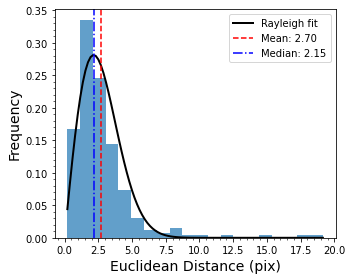

In [2]:
filters = ['f444w', 'f356w', 'f410m', 'f277w', 'f200w', 'f115w', 'f125w', 'f160w', 'f606w', 'f814w']

# Calculate distances and create the table
distance_table, mean_distances = calculate_euclidean_distances(galaxy_ids, filters)

# Plot histogram for the single filter JWST f444w
fig, ax = plt.subplots(figsize=(5, 4), facecolor='white')

# Extract required information from table created for F444W. Then create a histogram for this data
filter_name = 'f444w'
data = distance_table[filter_name].dropna()
ax.hist(data, bins=20, alpha=0.7, density=True)

# Calculate mean and median
mean_distance = np.nanmean(data)
median_distance = np.nanmedian(data)

# Fit Rayleigh distribution to the histogram
sigma = mean_distance * np.sqrt(2 / np.pi)
x = np.linspace(min(data), max(data), 100)
pdf = rayleigh.pdf(x, scale=sigma)
ax.plot(x, pdf, 'k-', linewidth=2, label='Rayleigh fit')

# Plot mean and median lines and include respective legend
ax.axvline(x=mean_distance, color='r', linestyle='--', label=f'Mean: {mean_distance:.2f}')
ax.axvline(x=median_distance, color='b', linestyle='-.', label=f'Median: {median_distance:.2f}')

# Major and minor ticks set at a certain frequency
ax.xaxis.set_major_locator(ticker.MultipleLocator(2.5))  
ax.xaxis.set_minor_locator(ticker.AutoMinorLocator(0.5))   
ax.yaxis.set_major_locator(ticker.MultipleLocator(0.05))  
ax.yaxis.set_minor_locator(ticker.AutoMinorLocator(0.0025))   

# Enable minor ticks
ax.minorticks_on()

# Hide tick labels for minor ticks by setting label size = 0
ax.tick_params(axis='x', which='minor', labelsize=0)
ax.tick_params(axis='y', which='minor', labelsize=0)

# Set plot axis titles
ax.set_xlabel('Euclidean Distance (pix)', fontsize=14)
ax.set_ylabel('Frequency', fontsize=14)

# Update legend with increased font size
ax.legend(fontsize=10)

# Save the plot
plt.tight_layout()
plt.savefig('Final_Rayleigh_F444W.png', dpi=600)
plt.show()


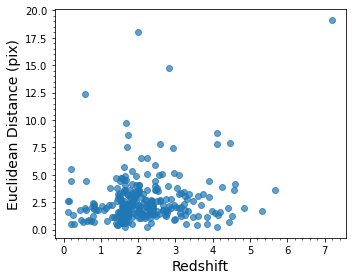

In [3]:
# Define CANDELS file the function has to read
redshift_filename = 'hlsp_candels_hst_wfc3_egs_multi_v1_mass-cat.csv.txt'

# Calculate distances and redshifts, and create the table
distance_table, mean_distances = calculate_distances_and_redshifts(galaxy_ids, filters, redshift_filename)

# Plot scatter plot for the filter F444w
fig, ax = plt.subplots(figsize=(5, 4), facecolor='white')

data = distance_table[filter_name].dropna()
redshifts = distance_table.loc[data.index, 'redshift']

# Scatter plot created below
ax.scatter(redshifts, data, alpha=0.7)

# Set x and y axis labels
ax.set_xlabel('Redshift', fontsize=14)
ax.set_ylabel('Euclidean Distance (pix)', fontsize=14)

# Add major and minor ticks
ax.xaxis.set_major_locator(ticker.MultipleLocator(1))  
ax.xaxis.set_minor_locator(ticker.AutoMinorLocator(0.25))   

ax.yaxis.set_major_locator(ticker.MultipleLocator(2.5)) 
ax.yaxis.set_minor_locator(ticker.AutoMinorLocator(0.5))   

# Enable minor ticks
ax.minorticks_on()

# Hide tick labels for minor ticks
ax.tick_params(axis='x', which='minor', labelsize=0)
ax.tick_params(axis='y', which='minor', labelsize=0)

# Adjust tick label font size for major ticks
ax.tick_params(axis='x', which='major', labelsize=10)
ax.tick_params(axis='y', which='major', labelsize=10)

# Tight layout and saving the plot
plt.tight_layout()
plt.savefig('Final_Euclideanredshift_F444W.png', dpi=600)
plt.show()


# Appendix Combined Graph - 1

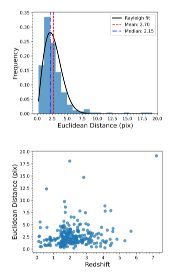

In [4]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

# Define Image Path for the two graphs 
image1 = mpimg.imread('Final_Rayleigh_F444W.png')  
image2 = mpimg.imread('Final_Euclideanredshift_F444W.png') 

# Create a figure with two subplots in one single column
fig, axs = plt.subplots(2, 1, figsize=(3,4), facecolor='white')

# Display the first image on the top panel and hide any axes
axs[0].imshow(image1)
axs[0].axis('off')  

# Display the second image on the bottom panel and hide any axes
axs[1].imshow(image2)
axs[1].axis('off') 

plt.tight_layout()

# Save the combined figure
plt.savefig('Paper_combined_AppA.png', dpi=600)

# Show the plot
plt.show()


# Graph of Stellar Mass vs Redshift for all discs

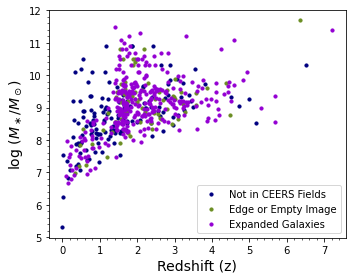

In [5]:
# Import needed packages
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker

# Total number of disks identified by Ferriera (531 in this case)
trial = [10239, 10315, 10464, 10990, 11013, 11028, 11097, 11244, 11258, 11289, 
             11576, 11608, 11743, 11832, 11857, 11860, 12360, 12467, 12517, 12593, 
             12766, 12809, 12881, 12966, 13063, 13108, 13212, 13409, 13432, 13512, 
             13914, 13932, 14140, 14260, 14362, 14483, 14527, 14559, 14591, 14739, 
             14896, 14921, 15036, 15039, 15590, 15607, 15645, 15792, 15956, 16087, 
             16181, 16193, 16311, 16400, 16559, 16859, 17208, 17338, 17473, 17538, 
             17580, 17770, 18116, 18211, 18296, 18446, 18454, 18523, 18635, 18709, 
             18780, 18789, 18792, 18922, 19053, 19427, 20025, 20175, 20341, 20371, 
             20503, 20701, 20742, 20762, 20837, 20851, 20906, 20998, 21048, 21080, 
             21081, 21133, 21177, 21197, 21231, 21320, 21331, 21378, 21471, 21479, 
             21505, 21586, 21609, 21648, 21709, 21783, 21788, 21797, 21836, 21852, 
             21861, 21865, 21886, 21990, 22019, 22052, 22056, 22145, 22207, 22219, 
             22267, 22311, 22396, 22401, 22487, 22525, 22532, 22550, 22567, 22604, 
             22623, 22646, 22738, 22739, 22788, 22801, 22814, 22815, 22858, 22891, 
             23060, 23096, 23102, 23116, 23140, 23158, 23272, 23276, 23294, 23304, 
             23320, 23321, 23325, 23375, 23386, 23399, 23424, 23473, 23484, 23522, 
             23537, 23581, 23604, 23607, 23663, 23686, 23691, 23721, 23747, 23748, 
             23797, 23811, 23841, 23867, 23888, 23981, 24009, 24138, 24157, 24310, 
             24328, 24383, 24492, 24565, 24619, 24676, 24708, 24757, 24820, 24955, 
             24965, 25029, 25058, 25075, 25079, 25120, 25155, 25217, 25234, 25235, 
             25281, 25437, 25443, 25490, 25510, 25527, 25540, 25604, 25767, 25875, 
             25947, 26079, 26109, 26183, 26210, 26229, 26390, 26404, 26418, 26502, 
             26503, 26581, 26651, 26670, 26723, 26825, 26891, 26929, 26940, 26963, 
             26966, 27001, 27061, 27076, 27119, 27172, 27233, 27358, 27377, 27402, 
             27425, 27490, 27523, 27686, 27695, 27704, 27824, 27922, 28421, 28438, 
             28440, 28461, 28595, 28689, 28695, 28925, 28961, 28969, 28989, 28995, 
             29110, 29118, 29122, 29125, 29178, 29179, 29226, 29238, 29279, 29298, 
             29444, 29524, 29531, 29541, 29565, 29618, 29725, 29749, 29846, 29995, 
             30060, 30062, 30076, 30156, 30266, 30299, 30341, 30379, 30446, 30473, 
             30496, 30530, 30618, 30626, 30716, 30849, 30911, 30918, 31001, 31061, 
             31063, 31085, 31164, 31189, 31281, 31283, 31305, 31342, 31404, 31448, 
             31510, 31517, 31580, 31615, 31663, 31664, 31715, 31765, 31775, 31806, 
             35280, 35622, 35648, 35657, 36120, 36379, 36500, 36855, 36928, 37208, 
             37383, 37407, 37745, 37799, 37943, 38032, 38061, 38101, 38193, 38206, 
             38267, 38291, 38376, 38451, 38459, 38485, 38554, 38729, 38792, 38883, 
             38922, 38933, 38937, 38965, 38980, 39147, 39195, 39197, 39230, 39355, 
             39519, 39527, 39554, 39627, 39696, 39712, 39949, 39978, 40107, 40151, 
             40210, 40295, 40303, 40394, 40551, 40607, 40749, 40876, 40974, 40990, 
             41000, 41026, 41049, 41136, 41153, 41162, 41258, 13201, 13311, 13363, 
             13786, 13983, 14111, 14304, 14466, 14916, 15110, 15162, 15521, 15548, 
             15966, 16043, 16227, 16708, 16732, 17073, 17079, 17116, 17188, 17246, 
             17299, 17426, 17482, 17508, 17647, 17780, 17910, 18093, 18124, 18230, 
             18428, 18447, 18492, 18589, 18724, 19258, 19377, 19454, 19618, 19661, 
             19697, 19763, 19787, 19818, 19855, 19856, 20154, 20375, 20386, 20490, 
             20712, 20723, 20750, 20768, 20827, 20835, 20934, 20965, 21051, 21205, 
             21307, 21410, 21443, 21450, 21467, 21484, 21486, 21588, 21617, 21656, 
             21685, 21698, 21772, 21802, 22069, 22072, 22271, 22322, 22387, 22476, 
             22531, 22540, 22628, 22640, 22668, 22676, 22729, 22866, 23061, 23062, 
             23398, 23680, 23692, 23710, 23805, 23888, 23954, 24062, 24158, 24169, 
             24568, 24596, 24696, 24740, 24838, 24899, 24922, 24961, 25067, 25187, 
             25291, 25303, 25305, 25340, 25557, 25799, 25819, 25868, 25943, 25985, 
             26144, 26169, 26225, 26349, 26472, 27096, 27099, 32673, 33014, 33246, 
             33578, 33654, 33860, 34044, 34198, 34484, 34587, 34633, 34668, 34931, 
             35924, 23205]

# UDS Galaxies identified by Ferriera (currently stands at 144)
not_in110 = [13201, 13311, 13363, 13786, 13983, 14111, 14304, 14466, 14916, 15110, 
       15162, 15521, 15548, 15966, 16043, 16227, 16708, 16732, 17073, 17079, 
       17116, 17188, 17246, 17299, 17426, 17482, 17508, 17647, 17780, 17910, 
       18093, 18124, 18230, 18428, 18447, 18492, 18589, 18724, 19258, 19377, 
       19454, 19618, 19661, 19697, 19763, 19787, 19818, 19855, 19856, 20154, 
       20375, 20386, 20490, 20712, 20723, 20750, 20768, 20827, 20835, 20934, 
       20965, 21051, 21205, 21307, 21410, 21443, 21450, 21467, 21484, 21486, 
       21588, 21617, 21656, 21685, 21698, 21772, 21802, 22069, 22072, 22271, 
       22322, 22387, 22476, 22531, 22540, 22628, 22640, 22668, 22676, 22729, 
       22866, 23061, 23062, 23398, 23680, 23692, 23710, 23805, 23888, 23954, 
       24062, 24158, 24169, 24568, 24596, 24696, 24740, 24838, 24899, 24922, 
       24961, 25067, 25187, 25291, 25303, 25305, 25340, 25557, 25799, 25819, 
       25868, 25943, 25985, 26144, 26169, 26225, 26349, 26472, 27096, 27099, 
       32673, 33014, 33246, 33578, 33654, 33860, 34044, 34198, 34484, 34587, 
       34633, 34668, 34931, 35924]

# EGS galaxies that either lie at edge of FITS Image or have empty image arrays
edge_zero_ids = [41258, 41162, 41136, 41049, 40974, 40876, 40749, 10315, 11289, 35622, 
                 40551, 40303, 39627, 38933, 38883, 38032, 36928, 30446, 30473, 30530, 
                 30618, 30626, 30716, 30849, 31061, 31164, 31510, 31517, 31663, 31664, 
                 31765, 30299, 30060, 29565, 29618, 29725, 29444, 29226, 29178, 28925, 
                 28969, 28689, 28421, 27695, 27523, 27425, 26825, 26390, 26229, 27377, 
                 23811, 24009, 23321, 23375, 22801, 23272, 22525, 22145, 21886, 20341, 
                 20371, 20503, 20742, 20837, 20998, 19053, 15590, 15792, 18780, 18446, 
                 16193, 16311, 17473, 17580, 38965, 26079]

# Function to obtain redshift values from CANDELS catalogue
def get_redshift(filename, galaxy_id):
    with open(filename, 'r') as file:
        for line in file:
            data = line.strip().split()
            if data[0] == str(galaxy_id):
                redshift = float(data[11])
                return redshift
    return None  

# Function to obtain Stellar Mass measurement from CANDELS catalogue
def get_mstar(filename, galaxy_id):
    with open(filename, 'r') as file:
        for line in file:
            data = line.strip().split()
            if data[0] == str(galaxy_id):
                mstar = float(data[37])
                return mstar
    return None  

# Define the CANDELS file to read information from. 
data_filename = 'hlsp_candels_hst_wfc3_egs_multi_v1_mass-cat.csv.txt'

# Lists to store redshift and mstar values
redshift_value = []
mstar_value = []

# Lists to store the data for each group
redshift_not_in110 = []
mstar_not_in110 = []

redshift_edge_zero = []
mstar_edge_zero = []

redshift_other = []
mstar_other = []

# Initialise for all 531 disc galaxies at first 
for i in trial:
    
    # Obtain the below measurements for all
    redshift = get_redshift(data_filename, i)
    mstar = get_mstar(data_filename, i)
    
    # If these above values are obtained for the ID
    if redshift is not None and mstar is not None:
        if i in not_in110:
            redshift_not_in110.append(redshift)
            mstar_not_in110.append(mstar)
        elif i in edge_zero_ids:
            redshift_edge_zero.append(redshift)
            mstar_edge_zero.append(mstar)
        else:
            redshift_other.append(redshift)
            mstar_other.append(mstar)

# Set up the basic elements of the Figure 
fig, ax = plt.subplots(figsize=(5, 4), facecolor='white')

# Plot points for each group 
ax.scatter(redshift_not_in110, mstar_not_in110, color='navy', label='Not in CEERS Fields', s=10)
ax.scatter(redshift_edge_zero, mstar_edge_zero, color='olivedrab', label='Edge or Empty Image', s=10)
ax.scatter(redshift_other, mstar_other, color='darkviolet', label='Expanded Galaxies', s=10)

# Add major and minor ticks
ax.xaxis.set_major_locator(ticker.MultipleLocator(1))  
ax.xaxis.set_minor_locator(ticker.AutoMinorLocator(5))   
ax.yaxis.set_major_locator(ticker.MultipleLocator(1))    
ax.yaxis.set_minor_locator(ticker.AutoMinorLocator(4))   

# Enable minor ticks
ax.minorticks_on()

# Hide tick labels for minor ticks by adjusting label size
ax.tick_params(axis='x', which='minor', labelsize=0)  
ax.tick_params(axis='y', which='minor', labelsize=0)  

# Set labels and title with font size
ax.set_xlabel('Redshift (z)', fontsize=14)
ax.set_ylabel(r'log $(M_\ast/M_\odot)$', fontsize=14)

# Display legend
ax.legend()

# Save and display plot
plt.tight_layout()
plt.savefig('Paper_Data.png', dpi=600)
plt.show()

# Rest Frame Wavelength Calculation

In [6]:
import csv
import numpy as np

# Function to obtain redshift values from CANDELS catalogue
def get_redshift(filename, galaxy_id):
    with open(filename, 'r') as file:
        for line in file:
            data = line.strip().split()
            if data[0] == str(galaxy_id):
                redshift = float(data[11])
                return redshift

# Filter names and their corresponding effective wavelengths (microns) in descending order. 

'''

Sites Accessed: 
HST WFC3: https://hst-docs.stsci.edu/wfc3ihb/chapter-7-ir-imaging-with-wfc3/7-5-ir-spectral-elements
JWST NIRCam: https://jwst-docs.stsci.edu/jwst-near-infrared-camera/nircam-instrumentation/nircam-filters#gsc.tab=0
HST ACS: http://svo2.cab.inta-csic.es/svo/theory/fps3/index.php?id=HST/ACS_HRC.F606W

'''

filters = {
    'F444W': 4.350426,
    'F410M': 4.072318,
    'F356W': 3.528704,
    'F277W': 2.727858,
    'F200W': 1.968041,
    'F160W': 1.527847,
    'F125W': 1.236355,
    'F115W': 1.143362,
    'F606W': 0.577643,
    'F814W': 0.801974
}

# List of galaxies to consider
galaxy_ids = [10239, 10315, 10464, 10990, 11013, 11028, 11097, 11244, 11258, 11289, 
             11576, 11608, 11743, 11832, 11857, 11860, 12360, 12467, 12517, 12593, 
             12766, 12809, 12881, 12966, 13063, 13108, 13212, 13409, 13432, 13512, 
             13914, 13932, 14140, 14260, 14362, 14483, 14527, 14559, 14591, 14739, 
             14896, 14921, 15036, 15039, 15590, 15607, 15645, 15792, 15956, 16087, 
             16181, 16193, 16311, 16400, 16559, 16859, 17208, 17338, 17473, 17538, 
             17580, 17770, 18116, 18211, 18296, 18446, 18454, 18523, 18635, 18709, 
             18780, 18789, 18792, 18922, 19053, 19427, 20025, 20175, 20341, 20371, 
             20503, 20701, 20742, 20762, 20837, 20851, 20906, 20998, 21048, 21080, 
             21081, 21133, 21177, 21197, 21231, 21320, 21331, 21378, 21471, 21479, 
             21505, 21586, 21609, 21648, 21709, 21783, 21788, 21797, 21836, 21852, 
             21861, 21865, 21886, 21990, 22019, 22052, 22056, 22145, 22207, 22219, 
             22267, 22311, 22396, 22401, 22487, 22525, 22532, 22550, 22567, 22604, 
             22623, 22646, 22738, 22739, 22788, 22801, 22814, 22815, 22858, 22891, 
             23060, 23096, 23102, 23116, 23140, 23158, 23272, 23276, 23294, 23304, 
             23320, 23321, 23325, 23375, 23386, 23399, 23424, 23473, 23484, 23522, 
             23537, 23581, 23604, 23607, 23663, 23686, 23691, 23721, 23747, 23748, 
             23797, 23811, 23841, 23867, 23888, 23981, 24009, 24138, 24157, 24310, 
             24328, 24383, 24492, 24565, 24619, 24676, 24708, 24757, 24820, 24955, 
             24965, 25029, 25058, 25075, 25079, 25120, 25155, 25217, 25234, 25235, 
             25281, 25437, 25443, 25490, 25510, 25527, 25540, 25604, 25767, 25875, 
             25947, 26079, 26109, 26183, 26210, 26229, 26390, 26404, 26418, 26502, 
             26503, 26581, 26651, 26670, 26723, 26825, 26891, 26929, 26940, 26963, 
             26966, 27001, 27061, 27076, 27119, 27172, 27233, 27358, 27377, 27402, 
             27425, 27490, 27523, 27686, 27695, 27704, 27824, 27922, 28421, 28438, 
             28440, 28461, 28595, 28689, 28695, 28925, 28961, 28969, 28989, 28995, 
             29110, 29118, 29122, 29125, 29178, 29179, 29226, 29238, 29279, 29298, 
             29444, 29524, 29531, 29541, 29565, 29618, 29725, 29749, 29846, 29995, 
             30060, 30062, 30076, 30156, 30266, 30299, 30341, 30379, 30446, 30473, 
             30496, 30530, 30618, 30626, 30716, 30849, 30911, 30918, 31001, 31061, 
             31063, 31085, 31164, 31189, 31281, 31283, 31305, 31342, 31404, 31448, 
             31510, 31517, 31580, 31615, 31663, 31664, 31715, 31765, 31775, 31806, 
             35280, 35622, 35648, 35657, 36120, 36379, 36500, 36855, 36928, 37208, 
             37383, 37407, 37745, 37799, 37943, 38032, 38061, 38101, 38193, 38206, 
             38267, 38291, 38376, 38451, 38459, 38485, 38554, 38729, 38792, 38883, 
             38922, 38933, 38937, 38965, 38980, 39147, 39195, 39197, 39230, 39355, 
             39519, 39527, 39554, 39627, 39696, 39712, 39949, 39978, 40107, 40151, 
             40210, 40295, 40303, 40394, 40551, 40607, 40749, 40876, 40974, 40990, 
             41000, 41026, 41049, 41136, 41153, 41162, 41258, 13201, 13311, 13363, 
             13786, 13983, 14111, 14304, 14466, 14916, 15110, 15162, 15521, 15548, 
             15966, 16043, 16227, 16708, 16732, 17073, 17079, 17116, 17188, 17246, 
             17299, 17426, 17482, 17508, 17647, 17780, 17910, 18093, 18124, 18230, 
             18428, 18447, 18492, 18589, 18724, 19258, 19377, 19454, 19618, 19661, 
             19697, 19763, 19787, 19818, 19855, 19856, 20154, 20375, 20386, 20490, 
             20712, 20723, 20750, 20768, 20827, 20835, 20934, 20965, 21051, 21205, 
             21307, 21410, 21443, 21450, 21467, 21484, 21486, 21588, 21617, 21656, 
             21685, 21698, 21772, 21802, 22069, 22072, 22271, 22322, 22387, 22476, 
             22531, 22540, 22628, 22640, 22668, 22676, 22729, 22866, 23061, 23062, 
             23398, 23680, 23692, 23710, 23805, 23888, 23954, 24062, 24158, 24169, 
             24568, 24596, 24696, 24740, 24838, 24899, 24922, 24961, 25067, 25187, 
             25291, 25303, 25305, 25340, 25557, 25799, 25819, 25868, 25943, 25985, 
             26144, 26169, 26225, 26349, 26472, 27096, 27099, 32673, 33014, 33246, 
             33578, 33654, 33860, 34044, 34198, 34484, 34587, 34633, 34668, 34931, 
             35924, 23205]

print('Number of galaxies being considered: ', len(galaxy_ids))

# Read the redshift data filename 
data_filename = 'hlsp_candels_hst_wfc3_egs_multi_v1_mass-cat.csv.txt'

# List to store the redshift values
redshift_values = []

# Output CSV file that needs to be created for this task
output_filename = 'galaxies_rest_frame_wavelength.csv'

# Open the CSV file for writing
with open(output_filename, 'w', newline='') as csvfile:
    
    # Create header titles for the CSV file
    fieldnames = ['Galaxy_ID', 'Redshift'] + [f'Rest_Frame_{filter}' for filter in filters]
    writer = csv.DictWriter(csvfile, fieldnames=fieldnames)

    writer.writeheader()

    # Loop through each galaxy
    for galaxy_id in galaxy_ids:
        
        # Get the redshift for the current galaxy ID
        redshift = get_redshift(data_filename, galaxy_id)
        redshift_values.append(redshift)

        # Create a dictionary to store the data for this galaxy
        galaxy_data = {'Galaxy_ID': galaxy_id, 'Redshift': redshift}

        # Calculate the rest frame wavelengths for each filter using rest_frame = lambda / (1 + z) formula
        for filter_name, wavelength in filters.items():
            rest_frame_wavelength = wavelength / (1 + redshift)
            galaxy_data[f'Rest_Frame_{filter_name}'] = rest_frame_wavelength

        # Write the galaxy data to the CSV file
        writer.writerow(galaxy_data)

print(f'Data saved to {output_filename}')


Number of galaxies being considered:  532
Data saved to galaxies_rest_frame_wavelength.csv


# Final Galaxy List common to all cells

In [7]:
galaxy_ids = [27001, 27061, 27076, 27233, 27358, 27402, 27704, 26670, 10239, 10464, 
              11028, 11097, 11244, 11576, 11608, 11743, 11832, 11857, 11860, 12360, 
              12467, 12517, 12593, 12881, 12966, 13108, 36500, 13212, 13409, 13432, 
              13512, 13932, 14140, 38193, 14260, 14362, 14483, 14527, 14559, 14591, 
              14739, 14896, 14921, 27119, 15036, 15039, 15607, 16087, 16181, 16559, 
              16859, 17208, 26651, 23205, 23386, 23399, 23424, 23473, 23484, 23522, 
              23604, 23607, 23663, 23686, 17338, 17538, 17770, 18116, 18211, 18454, 
              18523, 18789, 18792, 18922, 19427, 20175, 20701, 20906, 21080, 21081, 
              21133, 21177, 21231, 21320, 21331, 21378, 21471, 21479, 21505, 21586, 
              21609, 21648, 20025, 21709, 21783, 21797, 21836, 21852, 21861, 22019, 
              22052, 22207, 22219, 22311, 22396, 22401, 22487, 22532, 15956, 22550, 
              22567, 22604, 22623, 22646, 22738, 22739, 22788, 22858, 22891, 41153, 
              10990, 11013, 38922, 40210, 39519, 23060, 23102, 23158, 23276, 23304, 
              23691, 18709, 23721, 23747, 23748, 23867, 24138, 24157, 24310, 24328, 
              24383, 24619, 24676, 24757, 24820, 24965, 16400, 25029, 25155, 25217, 
              25234, 25079, 25120, 25235, 25281, 25437, 25443, 25490, 25510, 25527, 
              25540, 25604, 25767, 25875, 25947, 26183, 26210, 26418, 26502, 26503, 
              26581, 18296, 26723, 26891, 26929, 26940, 26963, 26966, 27824, 27922, 
              13063, 13914, 28438, 28440, 28461, 28595, 28695, 28989, 28995, 24565, 
              23797, 21788, 29110, 29118, 29125, 29179, 29279, 29298, 29524, 29531, 
              29541, 29749, 30062, 30076, 30156, 30266, 30341, 30379, 30911, 31001, 
              12766, 21048, 31063, 31085, 31189, 31281, 31283, 31342, 31448, 31580, 
              31615, 11258, 31715, 31775, 31305, 36855, 37383, 37407, 37943, 38206, 
              38267, 38291, 38376, 38459, 38485, 38554, 38729, 39147, 39197, 39355, 
              39554, 39696, 39978, 40107, 40295, 40607, 40990, 41000, 41026, 12809, 
              20762, 22267, 20851, 29995, 30496, 29238, 37745, 38101, 24955, 23205]

print(len(galaxy_ids))

260


# Appendix: Luminosity vs Stellar Mass Relationship (Redshift coloured)

In [8]:
# Import the needed libraries and packages
import h5py
import numpy as np
import matplotlib.pyplot as plt
from scipy import odr

# Function to obtain redshift values from CANDELS catalogue
def get_redshift(filename, galaxy_id):
    with open(filename, 'r') as file:
        for line in file:
            data = line.strip().split()
            if data[0] == str(galaxy_id):
                redshift = float(data[11])
                return redshift
            
# Function to obtain Stellar Mass measurement from CANDELS catalogue. 
def get_mstar(filename, galaxy_id):
    with open(filename, 'r') as file:
        for line in file:
            data = line.strip().split()
            if data[0] == str(galaxy_id):
                mstar = float(data[37])
                return mstar

# Function to obtain errors on stellar mass measurement from CANDELS catalogue.
def get_mstar_error(filename, galaxy_id):
    with open(filename, 'r') as file:
        for line in file:
            data = line.strip().split()
            if data[0] == str(galaxy_id):
                mstar_error = float(data[38])
                return mstar_error

# Function to calculate A_0 for m = 0
def calculate_amplitudes(coscoefs, sincoefs):
    A_0 = np.sqrt(np.sum(coscoefs[0, 0]**2 + sincoefs[0,0]**2))
    return A_0

filters = ['F444W']

nmin = 0
nmax = 24
num_realizations = 100

# Initialize a dictionary to hold the results for each galaxy
all_galaxy_results = {}

# Stellar mass + Redshift data file (CANDELS)
mstar_file = 'hlsp_candels_hst_wfc3_egs_multi_v1_mass-cat.csv.txt'

# Number of redshift bins and their edges
num_bins = 5
redshift_bins = np.linspace(0, 8, num_bins + 1)

# Assign colours for different bins
colors = plt.cm.viridis(np.linspace(0, 1, num_bins))

# Lists to store data for plotting
log_median_a0_values = []
stellar_masses = []
a0_uncertainties = []
stellar_mass_errors = []
redshifts = []

# Loop through each galaxy ID
for galaxy_id in galaxy_ids:
    
    file_path = f"{galaxy_id:05d}_error.hdf5"

    a0_values = {filter_name: [] for filter_name in filters}

    try:
        with h5py.File(file_path, 'r') as f:
            
            # Loop through each filter specified
            for filter_name in filters:
                
                key = filter_name.lower()
                
                # Define a path to obtaining coefficients from created HSF5 file
                coscoefs = f[f'{key}/{galaxy_id}/expansion/coscoefs'][:]
                sincoefs = f[f'{key}/{galaxy_id}/expansion/sincoefs'][:]

                # Loop through each of the 100 galaxy realisations
                for realization in range(num_realizations):
                    coscoefs_realization = coscoefs[:, :, realization]
                    sincoefs_realization = sincoefs[:, :, realization]
                    
                    # Calculate A0 for each realisation and save it
                    a0 = calculate_amplitudes(coscoefs_realization, sincoefs_realization)
                    a0_values[filter_name].append(a0)

        # Calculating median A0 value and associated uncertainty for desired number of filters
        median_uncertainty = {}
        for filter_name, values in a0_values.items():
            median = np.median(values)
            uncertainty = np.std(values)
            median_uncertainty[filter_name] = (median, uncertainty)
        
        # Store the results for the current galaxy
        all_galaxy_results[galaxy_id] = median_uncertainty
        
        # Get stellar mass and its error for the galaxy
        stellar_mass = get_mstar(mstar_file, galaxy_id)
        stellar_mass_error = get_mstar_error(mstar_file, galaxy_id)
        
        # Get redshift for the galaxy
        redshift = get_redshift(mstar_file, galaxy_id)
        
        # Calculate log median A0 value for plotting
        median_value = median_uncertainty[filters[0]][0]
        uncertainty_value = median_uncertainty[filters[0]][1]
        
        log_median_a0 = np.log10(median_value)
        
        # Calculate log(median + uncertainty) and log(median - uncertainty)
        log_upper_error = np.log10(median_value + uncertainty_value)
        log_lower_error = np.log10(median_value - uncertainty_value)

        # Calculate the upper and lower error bars in log space
        log_upper_error_bar = log_upper_error - log_median_a0
        log_lower_error_bar = log_median_a0 - log_lower_error

        # Append to lists for plotting
        log_median_a0_values.append(log_median_a0)
        stellar_masses.append(stellar_mass)
        a0_uncertainties.append([log_lower_error_bar, log_upper_error_bar])
        stellar_mass_errors.append(stellar_mass_error)
        redshifts.append(redshift)

    except Exception as e:
        print(f"Error processing galaxy ID {galaxy_id}: {e}")

# Convert lists to numpy arrays
log_median_a0_values = np.array(log_median_a0_values)
stellar_masses = np.array(stellar_masses)
a0_uncertainties = np.array(a0_uncertainties).T  
stellar_mass_errors = np.array(stellar_mass_errors)
redshifts = np.array(redshifts)

# Define a linear model for Scipy ODR fitting
def linear_model(B, x):
    return B[0] * x + B[1]

# Prepare the data for ODR fitting 
xdata = log_median_a0_values
ydata = stellar_masses
xerr = a0_uncertainties
yerr = stellar_mass_errors

# Create a Model object
linear = odr.Model(linear_model)

# Create a RealData object
data = odr.RealData(xdata, ydata, sx=xerr.mean(axis=0), sy=yerr)

# Create an ODR object
odr_obj = odr.ODR(data, linear, beta0=[1.0, 0.0])

# Run the ODR fitting
output = odr_obj.run()

# Extract the fitted parameters
beta = output.beta
beta_err = output.sd_beta

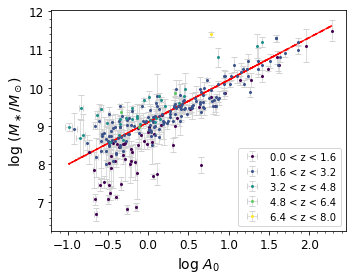

In [9]:
import matplotlib.ticker as ticker

# Plotting log median A0 vs. Stellar Mass with error bars and the fitted line
plt.figure(figsize=(5,4), facecolor='white')

# Plot each redshift bin with a different color
for i in range(num_bins):
    bin_mask = (redshifts >= redshift_bins[i]) & (redshifts < redshift_bins[i + 1])
    plt.errorbar(xdata[bin_mask], ydata[bin_mask], xerr=[xerr[0][bin_mask], xerr[1][bin_mask]], yerr=yerr[bin_mask], 
                 fmt='o', color=colors[i], ecolor='lightgray', elinewidth=0.75, capsize=3, markersize=2,
                 label=f'{redshift_bins[i]:.1f} < z < {redshift_bins[i + 1]:.1f}')

# Plot the fitted ODR found line
plt.plot(xdata, linear_model(beta, xdata), color='red', linestyle='--')

# Set up axis titles 
plt.ylabel(r'log $(M_\ast/M_\odot)$', fontsize=14)
plt.xlabel(r'log $A_0$', fontsize=14)

# Add major and minor ticks to the plot
plt.gca().xaxis.set_major_locator(ticker.MultipleLocator(0.5))  
plt.gca().xaxis.set_minor_locator(ticker.AutoMinorLocator(5))   

plt.gca().yaxis.set_major_locator(ticker.MultipleLocator(1))   
plt.gca().yaxis.set_minor_locator(ticker.AutoMinorLocator(4))  

# Enable minor ticks
plt.gca().minorticks_on()

# Set tick parameters for the plot
plt.gca().tick_params(axis='x', which='major', labelsize=12)
plt.gca().tick_params(axis='x', which='minor', labelsize=0)
plt.gca().tick_params(axis='y', which='major', labelsize=12)
plt.gca().tick_params(axis='y', which='minor', labelsize=0)

# Set the legend with a larger font size
plt.legend(fontsize=10)

plt.tight_layout()

# Save the plot with high resolution
plt.savefig('Paper_LogA0_by_Redshift.png', dpi=600)
plt.show()

# Asymmetry vs sSFR

In [10]:
import numpy as np
import h5py
import csv
import matplotlib.pyplot as plt
from scipy.stats import linregress

# Function to extract rest frame wavelengths for a given galaxy ID from CSV file created above
def extract_rest_frame_wavelengths(galaxy_id, csv_file):
    rest_frame_wavelengths = {}
    with open(csv_file, mode='r') as file:
        reader = csv.reader(file)
        next(reader)  
        for row in reader:
            try:
                csv_id = int(row[0])
                if csv_id == galaxy_id:
                    for i, filter_name in enumerate(filters):
                        rest_frame_wavelengths[filter_name] = float(row[2 + i])
                    break
            except (ValueError, IndexError):
                continue
    return rest_frame_wavelengths

# Function to obtain SFR values from CANDELS catalogue
def get_sfr(filename, galaxy_id):
    with open(filename, 'r') as file:
        for line in file:
            data = line.strip().split()
            if data[0] == str(galaxy_id):
                sfr = float(data[11])
                return sfr
            
# Function to obtain Stellar Mass measurement from CANDELS catalogue.
def get_mstar(filename, galaxy_id):
    with open(filename, 'r') as file:
        for line in file:
            data = line.strip().split()
            if data[0] == str(galaxy_id):
                mstar = float(data[37])
                return mstar

# Function to obtain redshift measurement from CANDELS catalogue.
def get_redshift(filename, galaxy_id):
    with open(filename, 'r') as file:
        for line in file:
            data = line.strip().split()
            if data[0] == str(galaxy_id):
                redshift = float(data[11])
                return redshift
            
# Function to calculate A_m and A_0 for a given m
def calculate_amplitudes(coscoefs, sincoefs, nmin, nmax, m):
    A_m = np.sqrt(np.sum(coscoefs[m, nmin:nmax+1]**2 + sincoefs[m, nmin:nmax+1]**2))
    A_0 = np.sqrt(np.sum(coscoefs[0, nmin:nmax+1]**2 + sincoefs[0, nmin:nmax+1]**2))
    return A_m, A_0

# Function to calculate asymmetry
def calculate_asymmetry(coscoefs, sincoefs, nmin, nmax):
    A_m, A_0 = calculate_amplitudes(coscoefs, sincoefs, nmin, nmax, 1)
    return A_m / A_0

# Filter Names (JWST + HST)
filters = ['F444W', 'F410M', 'F356W', 'F277W', 'F200W', 'F160W', 'F125W', 'F115W', 'F606W', 'F814W']

nmin = 0
nmax = 24
num_realizations = 100
mstar_file = 'hlsp_candels_hst_wfc3_egs_multi_v1_mass-cat.csv.txt'
redshift_file = 'hlsp_candels_hst_wfc3_egs_multi_v1_mass-cat.csv.txt'
sfr_file = 'hlsp_candels_hst_wfc3_egs_multi_v1_physpar-cat.txt'
rest_frame_file = 'galaxies_rest_frame_wavelength.csv'

# Initialize lists to hold sSFR, asymmetry values, and max_uncertainties for plotting
ssfr_values = []
asymmetry_values_for_plotting = []
max_uncertainties_for_plotting = []  

# Loop through each galaxy ID
for galaxy_id in galaxy_ids:
    file_path = f"{galaxy_id:05d}_error.hdf5"

    asymmetry_values = {filter_name: [] for filter_name in filters}

    try:
        with h5py.File(file_path, 'r') as f:
            for filter_name in filters:
                key = filter_name.lower()
                coscoefs = f[f'{key}/{galaxy_id}/expansion/coscoefs'][:]
                sincoefs = f[f'{key}/{galaxy_id}/expansion/sincoefs'][:]

                for realization in range(num_realizations):
                    coscoefs_realization = coscoefs[:, :, realization]
                    sincoefs_realization = sincoefs[:, :, realization]
                    asymmetry = calculate_asymmetry(coscoefs_realization, sincoefs_realization, nmin, nmax)
                    asymmetry_values[filter_name].append(asymmetry)

        # Calculating median and uncertainty of asymmetry for each filter
        median_uncertainty = {}
        for filter_name, values in asymmetry_values.items():
            median = np.median(values)
            uncertainty = np.std(values)
            median_uncertainty[filter_name] = (median, uncertainty)

        # Extract rest frame wavelengths for this galaxy
        rest_frame_wavelengths = extract_rest_frame_wavelengths(galaxy_id, rest_frame_file)

        # Filter based on rest frame wavelength (0.24 - 0.38 microns)
        chosen_asymmetry_values = []
        chosen_uncertainties = [] 
        for filter_name, (median, uncertainty) in median_uncertainty.items():
            rest_wavelength = rest_frame_wavelengths.get(filter_name)
            if rest_wavelength and 0.24 <= rest_wavelength <= 0.38:
                chosen_asymmetry_values.append(median)
                chosen_uncertainties.append(uncertainty)

        # Calculate the mean of the chosen asymmetry values
        if chosen_asymmetry_values:
            mean_asymmetry = np.mean(chosen_asymmetry_values)

            # Get the maximum uncertainty from the chosen uncertainties
            max_uncertainty = np.max(chosen_uncertainties)

            # Store the max_uncertainty for plotting
            max_uncertainties_for_plotting.append(max_uncertainty)

            # Obtain the SFR for this galaxy
            sfr = get_sfr(sfr_file, galaxy_id)

            # Obtain the stellar mass for this galaxy
            mstar = get_mstar(mstar_file, galaxy_id)

            # Calculate the specific star formation rate (sSFR)
            if sfr is not None and mstar is not None and mstar > 0:
                ssfr = sfr / mstar

                # Store the sSFR and mean asymmetry for plotting
                ssfr_values.append(ssfr)
                asymmetry_values_for_plotting.append(mean_asymmetry)
                max_uncertainties_for_plotting.append(max_uncertainty)
                
    except Exception as e:
        print(f"Error processing galaxy ID {galaxy_id}: {e}")

# Convert errors to log scale for plotting
log_asymmetry_values_for_plotting = []
asymmetry_errors_lower = []  
asymmetry_errors_upper = []  

for mean_asymmetry, max_uncertainty in zip(asymmetry_values_for_plotting, max_uncertainties_for_plotting):

    if mean_asymmetry > max_uncertainty:
        lower_bound = mean_asymmetry - max_uncertainty
        upper_bound = mean_asymmetry + max_uncertainty

        # Logarithm of the error bounds
        log_mean_asymmetry = np.log10(mean_asymmetry)
        log_upper_bound = np.log10(upper_bound)
        log_lower_bound = np.log10(lower_bound)

        # Calculate the errors in log space
        asymmetry_errors_upper.append(log_upper_bound - log_mean_asymmetry)  
        asymmetry_errors_lower.append(log_mean_asymmetry - log_lower_bound)  

        # Store the log mean asymmetry for plotting
        log_asymmetry_values_for_plotting.append(log_mean_asymmetry)
    else:
        # If mean_asymmetry <= max_uncertainty, skip this point to avoid invalid (negative number) log calculations
        print(f"Skipping galaxy with mean_asymmetry = {mean_asymmetry} and max_uncertainty = {max_uncertainty} due to invalid log range.")

# Convert sSFR values to log scale for plotting
log_ssfr_values = np.log10(ssfr_values)

In [11]:
import emcee
import numpy as np
import matplotlib.pyplot as plt

# Define the model: y = m * x + b
def model(x, m, b):
    return m * x + b

# Define Likelihood function for the model chosen (here linear)
def log_likelihood(theta, x, y, xerr_lower, xerr_upper, yerr):
    slope, intercept, sigma = theta
    x = np.array(x)  
    xerr_lower = np.array(xerr_lower)  
    xerr_upper = np.array(xerr_upper)  
    
    # Model for the y-values
    model = slope * x + intercept

    # Asymmetric x-errors
    model_x_err = np.where(model < x, slope * xerr_lower, slope * xerr_upper)

    # Combine x and y errors
    total_error = np.sqrt(yerr ** 2 + model_x_err ** 2 + sigma ** 2)
    
    # Log-likelihood with x and y errors
    return -0.5 * np.sum(np.log(2 * np.pi * total_error ** 2) + (y - model) ** 2 / total_error ** 2)

# Log prior function
def log_prior(theta):
    slope, intercept, sigma = theta
    if -10.0 < slope < 10.0 and -10.0 < intercept < 10.0 and 0.0 < sigma < 10.0:
        return 0.0  
    return -np.inf

def log_probability(theta, x, y, xerr_lower, xerr_upper, yerr):
    lp = log_prior(theta)
    if not np.isfinite(lp):
        return -np.inf
    return lp + log_likelihood(theta, x, y, xerr_lower, xerr_upper, yerr)


# Initial guess for the slope, intercept, and sigma
initial_guess = [0.5, 0.5, 1.0]  

# Set up the number of walkers and initial positions of walkers
nwalkers = 32

# slope, intercept, and sigma (1 + 1 + 1 = 3)
ndim = 3  

pos = initial_guess + 1e-4 * np.random.randn(nwalkers, ndim)

# xerr contains both lower and upper uncertainties
xerr = [asymmetry_errors_lower, asymmetry_errors_upper]

# Convert asymmetric x-errors into an average error for simplicity
average_xerr = np.mean(xerr, axis=0)  

# Error on sSFR is set to 0 as there are no reported values provided by CANDELS to include
yerr = np.zeros_like(log_ssfr_values)  

# Initialize the sampler with xerr_lower, xerr_upper, and yerr errors included
sampler = emcee.EnsembleSampler(
    nwalkers, ndim, log_probability, 
    args=(log_asymmetry_values_for_plotting, log_ssfr_values, asymmetry_errors_lower, asymmetry_errors_upper, yerr)
)

# Run the MCMC chains
sampler.run_mcmc(pos, 5000, progress=True)

# Extract the flat samples
flat_samples = sampler.get_chain(discard=100, thin=15, flat=True)

# Extract the best-fit values (mean of the posterior distribution)
slope_mcmc, intercept_mcmc, sigma_mcmc = np.mean(flat_samples, axis=0)

# Generate points for the trend line using the MCMC fit
trend_line_x = np.linspace(np.min(log_asymmetry_values_for_plotting), np.max(log_asymmetry_values_for_plotting), 100)
trend_line_y_mcmc = slope_mcmc * trend_line_x + intercept_mcmc


100%|██████████████████████████████████████| 5000/5000 [00:28<00:00, 175.54it/s]


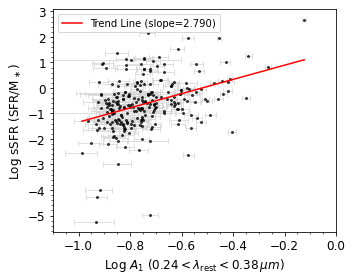

In [12]:
import matplotlib.ticker as ticker

# Plot the scatter plot with the trend line
plt.figure(figsize=(5, 4), facecolor='white')

# Plot the data points including error bars
plt.errorbar(
    log_asymmetry_values_for_plotting, log_ssfr_values, 
    xerr=[asymmetry_errors_lower, asymmetry_errors_upper], 
    fmt='o', color='black',  
    ecolor='lightgray',  
    elinewidth=1.0, 
    alpha=0.7, markersize=2, capsize=3,
    zorder=2  
)

# Plot the trend line, with a higher zorder so it appears on top of datapoints plotted in line before
plt.plot(
    trend_line_x, trend_line_y_mcmc, 
    'r-', label=f'Trend Line (slope={slope_mcmc:.3f})', 
    zorder=3  
)

# Set axis labels and font size
plt.xlabel(r'Log $A_1$ ($0.24 < \lambda_{\rm rest} < 0.38 \, \mu m$)', fontsize=12)

plt.ylabel(r'Log sSFR (SFR/M$_\ast$)', fontsize=12)

# Set up x axis limit given that one error bar is really big!
plt.xlim(-1.1,0.0)

# Add major and minor ticks to the plot
plt.gca().xaxis.set_major_locator(ticker.MultipleLocator(0.2))  
plt.gca().xaxis.set_minor_locator(ticker.AutoMinorLocator(5))   

plt.gca().yaxis.set_major_locator(ticker.MultipleLocator(1)) 
plt.gca().yaxis.set_minor_locator(ticker.AutoMinorLocator(5))   

# Enable minor ticks
plt.gca().minorticks_on()

# Set tick parameters for the plot
plt.gca().tick_params(axis='x', which='major', labelsize=12)
plt.gca().tick_params(axis='x', which='minor', labelsize=0)
plt.gca().tick_params(axis='y', which='major', labelsize=12)
plt.gca().tick_params(axis='y', which='minor', labelsize=0)

plt.legend()

plt.tight_layout()
plt.savefig('Paper_sSFR_with_trend.png', dpi=600)
plt.show()


# Asymmetry vs Stellar Mass

In [13]:
import numpy as np
import h5py
import matplotlib.pyplot as plt

# Function to obtain Stellar Mass measurement from CANDELS catalogue.
def get_mstar(filename, galaxy_id):
    with open(filename, 'r') as file:
        for line in file:
            data = line.strip().split()
            if data[0] == str(galaxy_id):
                mstar = float(data[37])
                return mstar

# Function to obtain Redshift measurement from CANDELS catalogue.
def get_redshift(filename, galaxy_id):
    with open(filename, 'r') as file:
        for line in file:
            data = line.strip().split()
            if data[0] == str(galaxy_id):
                redshift = float(data[11])
                return redshift

# Function to calculate A_m and A_0 for a given m
def calculate_amplitudes(coscoefs, sincoefs, nmin, nmax, m):
    A_m = np.sqrt(np.sum(coscoefs[m, nmin:nmax+1]**2 + sincoefs[m, nmin:nmax+1]**2))
    A_0 = np.sqrt(np.sum(coscoefs[0, nmin:nmax+1]**2 + sincoefs[0, nmin:nmax+1]**2))
    return A_m, A_0

# Function to calculate asymmetry
def calculate_asymmetry(coscoefs, sincoefs, nmin, nmax):
    A_m, A_0 = calculate_amplitudes(coscoefs, sincoefs, nmin, nmax, 1)
    return A_m / A_0

# Filter Names (JWST + HST)
filters = ['F444W', 'F410M', 'F356W', 'F277W', 'F200W', 'F160W', 'F125W', 'F115W', 'F606W', 'F814W']

nmin = 0
nmax = 24
num_realizations = 100
mstar_file = 'hlsp_candels_hst_wfc3_egs_multi_v1_mass-cat.csv.txt'
redshift_file = 'hlsp_candels_hst_wfc3_egs_multi_v1_mass-cat.csv.txt'

# Initialize lists to hold the results
stellar_masses = []
log_asymmetry_errors_upper = []
log_asymmetry_errors_lower = []
redshift_values = []

# Loop through each galaxy ID
for galaxy_id in galaxy_ids:
    file_path = f"{galaxy_id:05d}_error.hdf5"

    asymmetry_values = {filter_name: [] for filter_name in filters}

    try:
        with h5py.File(file_path, 'r') as f:
            for filter_name in filters:
                key = filter_name.lower()
                coscoefs = f[f'{key}/{galaxy_id}/expansion/coscoefs'][:]
                sincoefs = f[f'{key}/{galaxy_id}/expansion/sincoefs'][:]

                for realization in range(num_realizations):
                    coscoefs_realization = coscoefs[:, :, realization]
                    sincoefs_realization = sincoefs[:, :, realization]
                    asymmetry = calculate_asymmetry(coscoefs_realization, sincoefs_realization, nmin, nmax)
                    asymmetry_values[filter_name].append(asymmetry)

        # Calculating median and uncertainty for the F444W filter
        median_asymmetry = np.median(asymmetry_values['F444W'])
        error_asymmetry = np.std(asymmetry_values['F444W'])
        
        # Calculate log of median asymmetry
        log_median_asymmetry = np.log10(median_asymmetry)
        
        # Calculate the upper and lower bounds of the error
        upper_error = np.log10(median_asymmetry + error_asymmetry) - log_median_asymmetry
        lower_error = log_median_asymmetry - np.log10(median_asymmetry - error_asymmetry)
        
        # Get the stellar mass and redshift for the galaxy
        mstar = get_mstar(mstar_file, galaxy_id)
        redshift = get_redshift(redshift_file, galaxy_id)
        
        stellar_masses.append((galaxy_id, mstar, log_median_asymmetry))
        log_asymmetry_errors_upper.append(upper_error)
        log_asymmetry_errors_lower.append(lower_error)
        redshift_values.append(redshift)

    except Exception as e:
        print(f"Error processing galaxy ID {galaxy_id}: {e}")

# Convert stellar masses and redshift lists to numpy arrays for plotting
stellar_masses = np.array(stellar_masses)
redshift_values = np.array(redshift_values)
log_asymmetry_errors_upper = np.array(log_asymmetry_errors_upper)  # Convert error list to numpy array
log_asymmetry_errors_lower = np.array(log_asymmetry_errors_lower)  # Convert error list to numpy array
galaxy_ids_plot, stellar_mass_values, log_median_asymmetry_f444w_plot = stellar_masses[:, 0], stellar_masses[:, 1], stellar_masses[:, 2]

# Combine the upper and lower errors into one array
log_asymmetry_errors = [log_asymmetry_errors_lower, log_asymmetry_errors_upper]

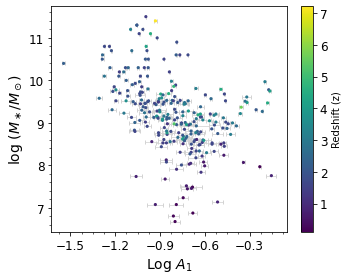

In [14]:
import matplotlib.ticker as ticker

# Create the plot with error bars behind the points
plt.figure(figsize=(5, 4), facecolor='white')

# Plot the error bars first
plt.errorbar(log_median_asymmetry_f444w_plot, stellar_mass_values, xerr=log_asymmetry_errors, 
             fmt='none', ecolor='lightgray', elinewidth=0.75, capsize=2, zorder=1, markersize = 2)

# Use a scatter plot with color based on redshift
sc = plt.scatter(log_median_asymmetry_f444w_plot, stellar_mass_values, c=redshift_values, cmap='viridis', 
                 s=10, edgecolor='none', zorder=2)  # Reduce the point size here

# Add color bar to indicate redshift values
cbar = plt.colorbar(sc)
cbar.set_label('Redshift (z)')

# Set labels
plt.xlabel(r'Log $A_1$', fontsize=14)
plt.ylabel(r'log $(M_\ast/M_\odot)$', fontsize=14)

# Add major and minor ticks to the plot
plt.gca().xaxis.set_major_locator(ticker.MultipleLocator(0.3))  # Major ticks every 0.3 for x-axis
plt.gca().xaxis.set_minor_locator(ticker.AutoMinorLocator(5))   # Minor ticks between major ticks on x-axis

plt.gca().yaxis.set_major_locator(ticker.MultipleLocator(1))    # Major ticks every 1 for y-axis
plt.gca().yaxis.set_minor_locator(ticker.AutoMinorLocator(5))   # Minor ticks between major ticks on y-axis

# Enable minor ticks
plt.gca().minorticks_on()

# Set tick parameters for the plot
plt.gca().tick_params(axis='x', which='major', labelsize=12)
plt.gca().tick_params(axis='x', which='minor', labelsize=0)
plt.gca().tick_params(axis='y', which='major', labelsize=12)
plt.gca().tick_params(axis='y', which='minor', labelsize=0)

# Set the legend (for color bar) with a larger font size
cbar.ax.tick_params(labelsize=12)

plt.tight_layout()

# Save the plot
plt.savefig('Paper_Log_Mstar_Redshift.png', dpi=600)
plt.show()

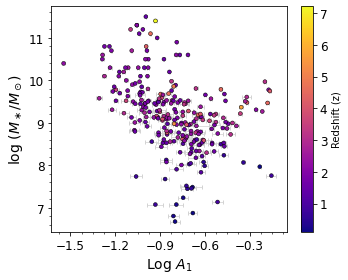

In [15]:
import matplotlib.ticker as ticker

import matplotlib.colors as mcolors

# Create the plot with error bars behind the points
plt.figure(figsize=(5, 4), facecolor='white')

# Plot the error bars first
plt.errorbar(log_median_asymmetry_f444w_plot, stellar_mass_values, xerr=log_asymmetry_errors, 
             fmt='none', ecolor='lightgray', elinewidth=0.75, capsize=2, zorder=1, markersize = 2)

# Define the new colormap since virdis isn't giving desired colour range
cmap = 'plasma'

# Normalize the redshift values to better emphasize the color differences
norm = plt.Normalize(vmin=np.min(redshift_values), vmax=np.max(redshift_values))

# Use scatter plot with new colormap
sc = plt.scatter(log_median_asymmetry_f444w_plot, stellar_mass_values, 
                 c=redshift_values, cmap=cmap, norm=norm, s=15, edgecolor='black', linewidth=0.5,zorder=2)

# Add color bar to indicate redshift values with the colormap
cbar = plt.colorbar(sc)
cbar.set_label('Redshift (z)')

# Set labels
plt.xlabel(r'Log $A_1$', fontsize=14)
plt.ylabel(r'log $(M_\ast/M_\odot)$', fontsize=14)

# Add major and minor ticks to the plot
plt.gca().xaxis.set_major_locator(ticker.MultipleLocator(0.3))  # Major ticks every 0.3 for x-axis
plt.gca().xaxis.set_minor_locator(ticker.AutoMinorLocator(5))   # Minor ticks between major ticks on x-axis

plt.gca().yaxis.set_major_locator(ticker.MultipleLocator(1))    # Major ticks every 1 for y-axis
plt.gca().yaxis.set_minor_locator(ticker.AutoMinorLocator(5))   # Minor ticks between major ticks on y-axis

# Enable minor ticks
plt.gca().minorticks_on()

# Set tick parameters for the plot
plt.gca().tick_params(axis='x', which='major', labelsize=12)
plt.gca().tick_params(axis='x', which='minor', labelsize=0)
plt.gca().tick_params(axis='y', which='major', labelsize=12)
plt.gca().tick_params(axis='y', which='minor', labelsize=0)

# Set the legend (for color bar) with a larger font size
cbar.ax.tick_params(labelsize=12)

plt.tight_layout()

# Save the plot
plt.savefig('Paper_Log_Mstar_Redshift.png', dpi=600)
plt.show()

In [16]:
import numpy as np
import h5py
import matplotlib.pyplot as plt

# Function to obtain Stellar Mass measurement from CANDELS catalogue.
def get_mstar(filename, galaxy_id):
    with open(filename, 'r') as file:
        for line in file:
            data = line.strip().split()
            if data[0] == str(galaxy_id):
                mstar = float(data[37])
                return mstar

# Function to obtain redshift measurement from CANDELS catalogue.
def get_redshift(filename, galaxy_id):
    with open(filename, 'r') as file:
        for line in file:
            data = line.strip().split()
            if data[0] == str(galaxy_id):
                redshift = float(data[11])
                return redshift
            
# Function to calculate A_m and A_0 for a given m
def calculate_amplitudes(coscoefs, sincoefs, nmin, nmax, m):
    A_m = np.sqrt(np.sum(coscoefs[m, nmin:nmax+1]**2 + sincoefs[m, nmin:nmax+1]**2))
    A_0 = np.sqrt(np.sum(coscoefs[0, nmin:nmax+1]**2 + sincoefs[0, nmin:nmax+1]**2))
    return A_m, A_0

# Function to calculate asymmetry
def calculate_asymmetry(coscoefs, sincoefs, nmin, nmax):
    A_m, A_0 = calculate_amplitudes(coscoefs, sincoefs, nmin, nmax, 1)
    return A_m / A_0

# Filter Names (JWST + HST)
filters = ['F444W', 'F410M', 'F356W', 'F277W', 'F200W', 'F160W', 'F125W', 'F115W', 'F606W', 'F814W']

nmin = 0
nmax = 24
num_realizations = 100
mstar_file = 'hlsp_candels_hst_wfc3_egs_multi_v1_mass-cat.csv.txt'
redshift_file = 'hlsp_candels_hst_wfc3_egs_multi_v1_mass-cat.csv.txt'

# Initialize dictionaries to hold the results
median_asymmetry_f444w = {}
stellar_masses = []
asymmetry_errors = []
redshift_values = []

# Loop through each galaxy ID
for galaxy_id in galaxy_ids:
    file_path = f"{galaxy_id:05d}_error.hdf5"

    asymmetry_values = {filter_name: [] for filter_name in filters}

    try:
        with h5py.File(file_path, 'r') as f:
            for filter_name in filters:
                key = filter_name.lower()
                coscoefs = f[f'{key}/{galaxy_id}/expansion/coscoefs'][:]
                sincoefs = f[f'{key}/{galaxy_id}/expansion/sincoefs'][:]

                for realization in range(num_realizations):
                    coscoefs_realization = coscoefs[:, :, realization]
                    sincoefs_realization = sincoefs[:, :, realization]
                    asymmetry = calculate_asymmetry(coscoefs_realization, sincoefs_realization, nmin, nmax)
                    asymmetry_values[filter_name].append(asymmetry)

        # Calculating median for the F444W filter
        median_asymmetry = np.median(asymmetry_values['F444W'])
        error_asymmetry = np.std(asymmetry_values['F444W'])
        
        median_asymmetry_f444w[galaxy_id] = median_asymmetry
        
        # Get the stellar mass for the galaxy
        mstar = get_mstar(mstar_file, galaxy_id)
        
        # Get the redshift for the galaxy
        redshift = get_redshift(redshift_file, galaxy_id)

        stellar_masses.append((galaxy_id, mstar, median_asymmetry))
        asymmetry_errors.append(error_asymmetry)  
        redshift_values.append(redshift)  

    except Exception as e:
        print(f"Error processing galaxy ID {galaxy_id}: {e}")

# Convert lists to numpy arrays for plotting
stellar_masses = np.array(stellar_masses)
asymmetry_errors = np.array(asymmetry_errors)  
redshift_values = np.array(redshift_values)  

galaxy_ids_plot, stellar_mass_values, median_asymmetry_f444w_plot = stellar_masses[:, 0], stellar_masses[:, 1], stellar_masses[:, 2]

log_asymmetry_errors = np.log10(asymmetry_errors)

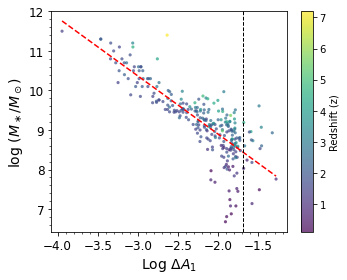

In [17]:
import matplotlib.ticker as ticker
import numpy as np
import matplotlib.pyplot as plt

# Plot with uncertainty on the x-axis and stellar mass on the y-axis
plt.figure(figsize=(5, 4), facecolor='white')

# Scatter plot with color based on redshift
scatter = plt.scatter(log_asymmetry_errors, stellar_mass_values, c=redshift_values, cmap='viridis', alpha=0.7, edgecolors='none', s=10)

# Add color bar to indicate redshift values
cbar = plt.colorbar(scatter, label='Redshift (z)')

# Ensure that log_asymmetry_errors and stellar_mass_values are not NaN
valid_indices = ~np.isnan(log_asymmetry_errors) & ~np.isnan(stellar_mass_values)
sorted_errors = np.sort(log_asymmetry_errors[valid_indices])
trend_line = np.poly1d(np.polyfit(log_asymmetry_errors[valid_indices], stellar_mass_values[valid_indices], 1))
plt.plot(sorted_errors, trend_line(sorted_errors), color='red', linestyle='--')

# Vertical line to differentiate between image uncertainty and systematic uncertainty
plt.axvline(x=-1.69, color='black', linestyle='--', linewidth=1)

# Set labels with font size
plt.xlabel('Log $\Delta A_1$', fontsize=14)
plt.ylabel(r'log $(M_\ast/M_\odot)$', fontsize=14)

# Add major and minor ticks to the plot
plt.gca().xaxis.set_major_locator(ticker.MultipleLocator(0.5))  
plt.gca().xaxis.set_minor_locator(ticker.AutoMinorLocator(5))   

plt.gca().yaxis.set_major_locator(ticker.MultipleLocator(1))    
plt.gca().yaxis.set_minor_locator(ticker.AutoMinorLocator(5))   

# Enable minor ticks
plt.gca().minorticks_on()

# Set tick parameters for the plot
plt.gca().tick_params(axis='x', which='major', labelsize=12)
plt.gca().tick_params(axis='x', which='minor', labelsize=0)
plt.gca().tick_params(axis='y', which='major', labelsize=12)
plt.gca().tick_params(axis='y', which='minor', labelsize=0)

plt.tight_layout()

# Save the plot with high resolution
plt.savefig('Paper_Mstar_vs_uncertainty_Log_Redshift.png', dpi=600)
plt.show()


# Appendix Combined Graph

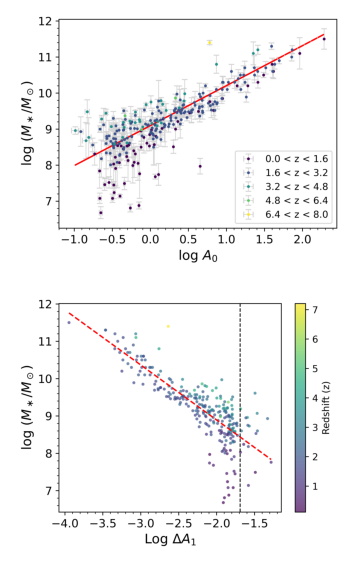

In [18]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import matplotlib.gridspec as gridspec

# Load the two images
image1 = mpimg.imread('Paper_LogA0_by_Redshift.png')  
image2 = mpimg.imread('Paper_Mstar_vs_uncertainty_Log_Redshift.png')  

# Create a gridspec with one column and two rows
fig = plt.figure(figsize=(6, 8), facecolor='white')  
gs = gridspec.GridSpec(2, 1, height_ratios=[1, 1])  

# Display the first image (top)
ax1 = fig.add_subplot(gs[0])
ax1.imshow(image1)
ax1.axis('off') 

# Display the second image (bottom)
ax2 = fig.add_subplot(gs[1])
ax2.imshow(image2)
ax2.axis('off')  

# Adjust layout
plt.tight_layout()

# Save the combined figure
plt.savefig('Paper_combined_AppB.png', dpi=600)

# Show the plot
plt.show()

# Asymmetry vs Rest Frame Wavelength (redshift binned)

Analysing these many galaxies for this plot:  260


100%|██████████████████████████████████████| 5000/5000 [00:29<00:00, 168.24it/s]


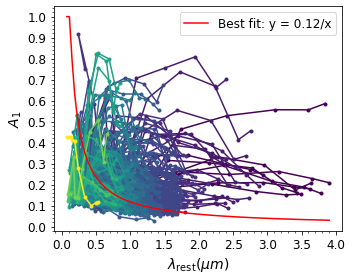

In [19]:
import csv
import h5py
import numpy as np
import matplotlib.pyplot as plt
import emcee
from scipy.optimize import minimize
import matplotlib.ticker as ticker

# List of filters
filters = ['F444W', 'F410M', 'F356W', 'F277W', 'F200W', 'F160W', 'F125W', 'F115W', 'F606W', 'F814W']

print('Analysing these many galaxies for this plot: ',len(galaxy_ids))

def get_redshift(filename, galaxy_id):
    """Obtain redshift value for a given galaxy ID from the CANDELS catalogue."""
    with open(filename, 'r') as file:
        for line in file:
            data = line.strip().split()
            if data[0] == str(galaxy_id):
                return float(data[11])
    return None

def calculate_amplitudes(coscoefs, sincoefs, nmin, nmax, m):
    """Calculate the amplitudes A_m and A_0."""
    A_m = np.sqrt(np.sum(coscoefs[m, nmin:nmax+1]**2 + sincoefs[m, nmin:nmax+1]**2))
    A_0 = np.sqrt(np.sum(coscoefs[0, nmin:nmax+1]**2 + sincoefs[0, nmin:nmax+1]**2))
    return A_m, A_0

def calculate_asymmetry(coscoefs, sincoefs, nmin, nmax):
    """Calculate asymmetry A_m / A_0."""
    A_m, A_0 = calculate_amplitudes(coscoefs, sincoefs, nmin, nmax, 1)
    return A_m / A_0

def extract_rest_frame_wavelengths(galaxy_id, csv_file):
    """Extract rest frame wavelengths for a given galaxy ID."""
    rest_frame_wavelengths = {}
    with open(csv_file, mode='r') as file:
        reader = csv.reader(file)
        next(reader)  # Skip the header row
        for row in reader:
            if int(row[0]) == galaxy_id:
                rest_frame_wavelengths = {filters[i]: float(row[2 + i]) for i in range(len(filters))}
                break
    return rest_frame_wavelengths

def categorize_galaxies_by_redshift(galaxy_ids, redshift_bins, redshift_file):
    """Categorize galaxies into redshift bins."""
    galaxy_bins = [[] for _ in range(len(redshift_bins) - 1)]
    redshift_values = [get_redshift(redshift_file, galaxy_id) for galaxy_id in galaxy_ids]
    
    for galaxy_id, redshift in zip(galaxy_ids, redshift_values):
        if redshift is not None:
            for i in range(len(redshift_bins) - 1):
                if redshift_bins[i] <= redshift < redshift_bins[i + 1]:
                    galaxy_bins[i].append(galaxy_id)
                    break
    return galaxy_bins, redshift_values

def log_likelihood(theta, x, y, yerr):
    """Compute the log likelihood for emcee fitting."""
    a = theta
    model = a / x
    sigma2 = yerr ** 2
    return -0.5 * np.sum((y - model) ** 2 / sigma2 + np.log(sigma2))

def log_prior(theta):
    """Define prior for emcee fitting."""
    a = theta
    if 0.0 < a < 100.0:
        return 0.0
    return -np.inf

def log_probability(theta, x, y, yerr):
    """Compute the log probability for emcee fitting."""
    lp = log_prior(theta)
    if not np.isfinite(lp):
        return -np.inf
    return lp + log_likelihood(theta, x, y, yerr)

def plot_a1_a0_vs_wavelength(galaxy_bins, redshift_bins, csv_file, all_galaxy_results):
    """Plot median asymmetry vs wavelength with best fit line and 5-sigma region."""
    plt.figure(figsize=(5, 4), facecolor='white')
    colors = plt.cm.viridis(np.linspace(0, 1, len(galaxy_bins)))
    
    x_data, y_data, yerr_data = [], [], []

    for bin_idx, galaxy_bin in enumerate(galaxy_bins):
        
        for galaxy_id in galaxy_bin:
            
            rest_frame_wavelengths = extract_rest_frame_wavelengths(galaxy_id, csv_file)
            
            if rest_frame_wavelengths and galaxy_id in all_galaxy_results:
                
                median_asymmetry_values = all_galaxy_results[galaxy_id]
                x = [rest_frame_wavelengths[filter_name] for filter_name in filters if filter_name in median_asymmetry_values]
                y = [median_asymmetry_values[filter_name][0] for filter_name in filters if filter_name in median_asymmetry_values]
                yerr = [median_asymmetry_values[filter_name][1] for filter_name in filters if filter_name in median_asymmetry_values]

                x_data.extend(x)
                y_data.extend(y)
                yerr_data.extend(yerr)

                plt.plot(x, y, marker='o', color=colors[bin_idx], markersize = 3)

    # Add legend for redshift bins (Not working rn...)
    z_labels = [f'{redshift_bins[i]:.2f} ≤ z < {redshift_bins[i+1]:.2f}' for i in range(len(redshift_bins)-1)]
    
    handles = [plt.Line2D([0], [0], color=colors[i], lw=4) for i in range(len(z_labels))]

    plt.legend(handles, z_labels, title='Redshift bins', fontsize=10, title_fontsize=12, loc='best')
    
    # Set labels
    plt.xlabel(r'$\lambda_{\rm rest} (\mu m)$', fontsize=14)
    plt.ylabel(r'$A_{1}$', fontsize=14)
    
    # Major and minor ticks
    plt.gca().xaxis.set_major_locator(ticker.MultipleLocator(0.5))  
    plt.gca().xaxis.set_minor_locator(ticker.AutoMinorLocator(5))   
    plt.gca().yaxis.set_major_locator(ticker.MultipleLocator(0.1))  
    plt.gca().yaxis.set_minor_locator(ticker.AutoMinorLocator(5))   

    # Enable minor ticks
    plt.gca().minorticks_on()

    # Set tick parameters for the plot
    plt.gca().tick_params(axis='x', which='major', labelsize=12)
    plt.gca().tick_params(axis='x', which='minor', labelsize=0)
    plt.gca().tick_params(axis='y', which='major', labelsize=12)
    plt.gca().tick_params(axis='y', which='minor', labelsize=0)
    

    x_data = np.array(x_data)
    y_data = np.array(y_data)
    yerr_data = np.array(yerr_data)

    if not np.all(np.isfinite(x_data)) or not np.all(np.isfinite(y_data)) or not np.all(np.isfinite(yerr_data)):
        raise ValueError("Non-finite values detected in data")

    # MCMC fitting
    nwalkers, ndim = 50, 1
    
    # Initial guess for a
    initial = np.array([1.0])  
    
    pos = initial + 1e-4 * np.random.randn(nwalkers, ndim)

    sampler = emcee.EnsembleSampler(nwalkers, ndim, log_probability, args=(x_data, y_data, yerr_data))
    sampler.run_mcmc(pos, 5000, progress=True)
    
    samples = sampler.get_chain(discard=100, thin=15, flat=True)
    a_mcmc = np.percentile(samples, 50, axis=0)
    
    # Generate fit line
    x_fit = np.linspace(min(x_data), max(x_data), 100)
    y_fit = np.clip(a_mcmc / x_fit, 0, 1)

    # Compute residuals and their standard deviation
    y_model = np.clip(a_mcmc / x_data, 0, 1)
    residuals = y_data - y_model
    std_residuals = np.std(residuals)
    
    # Compute 5 sigma deviation for future uses
    upper_bound = np.clip(y_fit + 5 * std_residuals, 0, 1)
    lower_bound = np.clip(y_fit - 5 * std_residuals, 0, 1)

    # Plot the fit line
    plt.plot(x_fit, y_fit, 'r-', label='Best fit: y = {:.2f}/x'.format(a_mcmc[0]), linewidth=1.5)

#     # Display the slope equation
#     slope = a_mcmc[0]
#     equation = f'y = {slope:.2f} / x'
#     plt.text(0.05, 0.95, equation, transform=plt.gca().transAxes, fontsize=12,
#              verticalalignment='top', bbox=dict(boxstyle='round,pad=0.3', edgecolor='black', facecolor='white'))

    plt.legend(fontsize=12)

    plt.tight_layout()
    
    # Save the plot
    plt.savefig('Paper_Redshiftbinned.png', dpi=600)
    plt.show()

# Main execution
redshift_bins = np.arange(0, 8, 0.5)
redshift_file = 'hlsp_candels_hst_wfc3_egs_multi_v1_mass-cat.csv.txt'
csv_file = 'galaxies_rest_frame_wavelength.csv'
galaxy_bins, redshift_values = categorize_galaxies_by_redshift(galaxy_ids, redshift_bins, redshift_file)

nmin = 0
nmax = 24
num_realizations = 100

all_galaxy_results = {}

for galaxy_id in galaxy_ids:
    file_path = f"{galaxy_id:05d}_error.hdf5"

    asymmetry_values = {filter_name: [] for filter_name in filters}

    try:
        with h5py.File(file_path, 'r') as f:
            for filter_name in filters:
                key = filter_name.lower()
                coscoefs = f[f'{key}/{galaxy_id}/expansion/coscoefs'][:]
                sincoefs = f[f'{key}/{galaxy_id}/expansion/sincoefs'][:]

                for realization in range(num_realizations):
                    coscoefs_realization = coscoefs[:, :, realization]
                    sincoefs_realization = sincoefs[:, :, realization]
                    asymmetry = calculate_asymmetry(coscoefs_realization, sincoefs_realization, nmin, nmax)
                    asymmetry_values[filter_name].append(asymmetry)

        median_uncertainty = {filter_name: (np.median(values), np.std(values)) for filter_name, values in asymmetry_values.items()}
        all_galaxy_results[galaxy_id] = median_uncertainty

    except Exception as e:
        print(f"Error processing galaxy ID {galaxy_id}: {e}")

plot_a1_a0_vs_wavelength(galaxy_bins, redshift_bins, csv_file, all_galaxy_results)

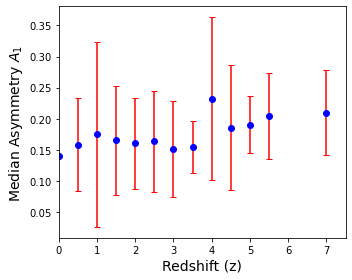

In [20]:
''' NOTE: THIS IS CONSIDERING ALL GALAXIES IRRESPECTIVE OF MASS '''
                
def plot_median_asymmetry_vs_redshift(galaxy_bins, redshift_bins, all_galaxy_results):
    """Plot median asymmetry value for each redshift bin, focusing on rest-frame wavelengths between 0.2 and 0.4 microns."""
    median_asymmetries = []
    asymmetry_errors = []

    # Define the wavelength range for filtering (0.2 to 0.4 microns)
    wavelength_min = 0.2
    wavelength_max = 0.4

    # Calculate median asymmetry and its spread (standard deviation) for each redshift bin
    for galaxy_bin in galaxy_bins:
        asymmetry_values_bin = []
        
        for galaxy_id in galaxy_bin:
            
            if galaxy_id in all_galaxy_results:
                
                # Collect asymmetry values from all filters for the galaxy within the wavelength range
                for filter_name in filters:
                    
                    if filter_name in all_galaxy_results[galaxy_id]:
                        rest_wavelength = extract_rest_frame_wavelengths(galaxy_id, csv_file).get(filter_name, None)
                        
                        if rest_wavelength and wavelength_min <= rest_wavelength <= wavelength_max:
                            asymmetry_value = all_galaxy_results[galaxy_id][filter_name][0]
                            asymmetry_values_bin.append(asymmetry_value)
        
        if asymmetry_values_bin:
            # Calculate median and standard deviation for the bin. Std deviation is used for error calculation
            median_asymmetries.append(np.median(asymmetry_values_bin))
            asymmetry_errors.append(np.std(asymmetry_values_bin))
        else:
            # If no galaxies found in this bin, append NaN value
            median_asymmetries.append(np.nan)
            asymmetry_errors.append(np.nan)

    # Convert to numpy arrays for easier masking of NaNs
    median_asymmetries = np.array(median_asymmetries)
    asymmetry_errors = np.array(asymmetry_errors)

    # Remove NaN values to avoid the code breaking. Essentially mask these values
    valid_bins = ~np.isnan(median_asymmetries)

    # Plot the median asymmetry vs redshift
    plt.figure(figsize=(5, 4), facecolor='white')
    plt.errorbar(redshift_bins[:-1][valid_bins], median_asymmetries[valid_bins], yerr=asymmetry_errors[valid_bins], fmt='o', color='b', ecolor='r', capsize=3)

    # Set labels
    plt.xlabel('Redshift (z)', fontsize=14)
    plt.ylabel('Median Asymmetry $A_1$', fontsize=14)

    # Set plot limits
    plt.xlim(redshift_bins[0], redshift_bins[-1])

    # Save and show plot
    plt.tight_layout()
    plt.savefig('Median_Asymmetry_vs_Redshift.png', dpi=600)
    plt.show()


# Call the function to generate the plot
plot_median_asymmetry_vs_redshift(galaxy_bins, redshift_bins, all_galaxy_results)


86


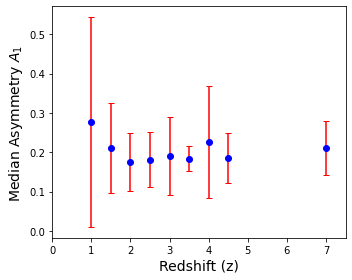

In [21]:
''' NOTE: THIS CONSIDERS GALAXIES BEYOND A CERTAIN STELLAR MASS THRESHOLD '''

# Function to obtain Stellar Mass measurement from CANDELS catalogue.
def get_mstar(filename, galaxy_id):
    with open(filename, 'r') as file:
        for line in file:
            data = line.strip().split()
            if data[0] == str(galaxy_id):
                return float(data[37])  # Assuming column 37 contains stellar mass

def plot_median_asymmetry_vs_redshift(galaxy_bins, redshift_bins, all_galaxy_results, mstar_file):
    """Plot median asymmetry value for each redshift bin, focusing on galaxies with M* > 8 M_sun."""
    median_asymmetries = []
    asymmetry_errors = []
    
    # Define the wavelength range for filtering (0.2 to 0.4 microns)
    wavelength_min = 0.2
    wavelength_max = 0.4
    mass_threshold = 9.5  

    counter = 0
    
    # Calculate median asymmetry and its spread (standard deviation) for each redshift bin
    for galaxy_bin in galaxy_bins:
        asymmetry_values_bin = []

        for galaxy_id in galaxy_bin:
            
            # Extract stellar mass
            mstar = get_mstar(mstar_file, galaxy_id)
            
            # Check if the galaxy mass is greater than the threshold
            if mstar and mstar > mass_threshold:
                
                counter +=1
                if galaxy_id in all_galaxy_results:
                    
                    # Collect asymmetry values from all filters for the galaxy within the wavelength range
                    for filter_name in filters:
                        if filter_name in all_galaxy_results[galaxy_id]:
                            rest_wavelength = extract_rest_frame_wavelengths(galaxy_id, csv_file).get(filter_name, None)
                            
                            if rest_wavelength and wavelength_min <= rest_wavelength <= wavelength_max:
                                asymmetry_value = all_galaxy_results[galaxy_id][filter_name][0]
                                asymmetry_values_bin.append(asymmetry_value)
        
        if asymmetry_values_bin:
            
            # Calculate median and standard deviation for the bin. Std deviation is used for error calculation
            median_asymmetries.append(np.median(asymmetry_values_bin))
            asymmetry_errors.append(np.std(asymmetry_values_bin))
        else:
            
            # If no galaxies found in this bin, append NaN value
            median_asymmetries.append(np.nan)
            asymmetry_errors.append(np.nan)

    print(counter)
    
    # Convert to numpy arrays for easier masking of NaNs
    median_asymmetries = np.array(median_asymmetries)
    asymmetry_errors = np.array(asymmetry_errors)

    # Remove NaN values to avoid the code breaking. Essentially mask these values
    valid_bins = ~np.isnan(median_asymmetries)

    # Plot the median asymmetry vs redshift
    plt.figure(figsize=(5, 4), facecolor='white')
    plt.errorbar(redshift_bins[:-1][valid_bins], median_asymmetries[valid_bins], yerr=asymmetry_errors[valid_bins], fmt='o', color='b', ecolor='r', capsize=3)

    # Set labels
    plt.xlabel('Redshift (z)', fontsize=14)
    plt.ylabel('Median Asymmetry $A_1$', fontsize=14)

    # Set plot limits
    plt.xlim(redshift_bins[0], redshift_bins[-1])

    # Save and show plot
    plt.tight_layout()
    plt.savefig('Median_Asymmetry_vs_Redshift.png', dpi=600)
    plt.show()

# Call the function to generate the plot
plot_median_asymmetry_vs_redshift(galaxy_bins, redshift_bins, all_galaxy_results, mstar_file='hlsp_candels_hst_wfc3_egs_multi_v1_mass-cat.csv.txt')


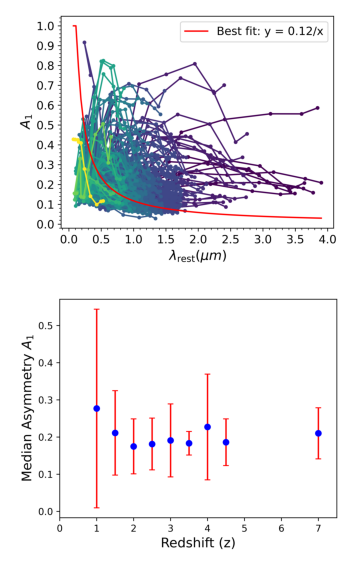

In [22]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import matplotlib.gridspec as gridspec

# Load the two images from local directory
image1 = mpimg.imread('Paper_Redshiftbinned.png')  
image2 = mpimg.imread('Median_Asymmetry_vs_Redshift.png')  

# Create a gridspec with one column and two rows
fig = plt.figure(figsize=(6, 8), facecolor='white')  
gs = gridspec.GridSpec(2, 1, height_ratios=[1, 1])  

# Display the first image (top)
ax1 = fig.add_subplot(gs[0])
ax1.imshow(image1)
ax1.axis('off')  

# Display the second image (bottom)
ax2 = fig.add_subplot(gs[1])
ax2.imshow(image2)
ax2.axis('off')  

# Adjust layout
plt.tight_layout()

# Save the combined figure
plt.savefig('Paper_combined_Results.png', dpi=600)

# Show the plot
plt.show()

# Visual Representation of above trend

100%|██████████████████████████████████████| 5000/5000 [00:26<00:00, 185.75it/s]
/var/folders/4_/sn1w1dm10wz6s04rryf39z3m0000gn/T/ipykernel_2506/2230140484.py:135: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


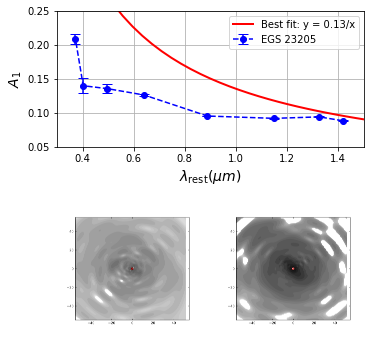

In [23]:
import csv
import h5py
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.gridspec import GridSpec
from matplotlib.image import imread
import emcee
from scipy.optimize import minimize
from mpl_toolkits.axes_grid1.inset_locator import inset_axes
from mpl_toolkits.axes_grid1.inset_locator import mark_inset


# List of filters
filters = ['F444W', 'F410M', 'F356W', 'F277W', 'F200W', 'F160W', 'F125W', 'F115W']

# Main execution setup
redshift_file = 'hlsp_candels_hst_wfc3_egs_multi_v1_mass-cat.csv.txt'
csv_file = 'galaxies_rest_frame_wavelength.csv'

# Galaxy ID for specific plotting
specific_galaxy_id = 23205

def extract_rest_frame_wavelengths(galaxy_id, csv_file):
    """Extract rest frame wavelengths for a given galaxy ID."""
    rest_frame_wavelengths = {}
    with open(csv_file, mode='r') as file:
        reader = csv.reader(file)
        next(reader)  
        for row in reader:
            if int(row[0]) == galaxy_id:
                rest_frame_wavelengths = {filters[i]: float(row[2 + i]) for i in range(len(filters))}
                break
    return rest_frame_wavelengths

def log_likelihood(theta, x, y, yerr):
    """Compute the log likelihood for emcee fitting."""
    a = theta
    model = a / x
    sigma2 = yerr ** 2
    return -0.5 * np.sum((y - model) ** 2 / sigma2 + np.log(sigma2))

def log_prior(theta):
    """Define prior for emcee fitting."""
    a = theta
    if 0.0 < a < 100.0:
        return 0.0
    return -np.inf

def log_probability(theta, x, y, yerr):
    """Compute the log probability for emcee fitting."""
    lp = log_prior(theta)
    if not np.isfinite(lp):
        return -np.inf
    return lp + log_likelihood(theta, x, y, yerr)

def plot_best_fit_and_specific_galaxy(galaxy_id, csv_file, all_galaxy_results):
    """Plot the best-fit line and asymmetry vs wavelength for a specific galaxy."""
    
    # Prepare the figure elements AND SIZE
    fig = plt.figure(figsize=(5.5, 6), facecolor='white')
    
    # Create GridSpec layout to have equal-sized plots
    gs = GridSpec(2, 2, width_ratios=[0.75, 0.75], height_ratios=[1, 1], hspace=0.4, wspace=0.1)
    ax_main = fig.add_subplot(gs[0, :])

    # Lists to store data points for fitting
    x_data, y_data, yerr_data = [], [], []

    for galaxy_id_key in all_galaxy_results.keys():
        rest_frame_wavelengths = extract_rest_frame_wavelengths(galaxy_id_key, csv_file)
        if rest_frame_wavelengths:
            median_asymmetry_values = all_galaxy_results[galaxy_id_key]
            x = [rest_frame_wavelengths[filter_name] for filter_name in filters if filter_name in median_asymmetry_values]
            y = [median_asymmetry_values[filter_name][0] for filter_name in filters if filter_name in median_asymmetry_values]
            yerr = [median_asymmetry_values[filter_name][1] for filter_name in median_asymmetry_values]

            x_data.extend(x)
            y_data.extend(y)
            yerr_data.extend(yerr)

    x_data = np.array(x_data)
    y_data = np.array(y_data)
    yerr_data = np.array(yerr_data)

    if not np.all(np.isfinite(x_data)) or not np.all(np.isfinite(y_data)) or not np.all(np.isfinite(yerr_data)):
        raise ValueError("Non-finite values detected in data")

    # Emcee fitting for best fit line
    nwalkers, ndim = 50, 1
    initial = np.array([1.0]) 
    pos = initial + 1e-4 * np.random.randn(nwalkers, ndim)

    sampler = emcee.EnsembleSampler(nwalkers, ndim, log_probability, args=(x_data, y_data, yerr_data))
    sampler.run_mcmc(pos, 5000, progress=True)
    
    samples = sampler.get_chain(discard=100, thin=15, flat=True)
    a_mcmc = np.percentile(samples, 50, axis=0)
    
    # Generate fit line
    x_fit = np.linspace(min(x_data), max(x_data), 100)
    y_fit = np.clip(a_mcmc / x_fit, 0, 1)

    # Plot the fit line
    ax_main.plot(x_fit, y_fit, 'r-', label='Best fit: y = {:.2f}/x'.format(a_mcmc[0]), linewidth=2.0)
    
    # Plot specific galaxy's asymmetry vs rest frame wavelength
    rest_frame_wavelengths = extract_rest_frame_wavelengths(specific_galaxy_id, csv_file)
    if specific_galaxy_id in all_galaxy_results and rest_frame_wavelengths:
        median_asymmetry_values = all_galaxy_results[specific_galaxy_id]
        x_specific = [rest_frame_wavelengths[filter_name] for filter_name in filters if filter_name in median_asymmetry_values]
        y_specific = [median_asymmetry_values[filter_name][0] for filter_name in filters if filter_name in median_asymmetry_values]
        y_err = [median_asymmetry_values[filter_name][1] for filter_name in filters if filter_name in median_asymmetry_values]
        ax_main.errorbar(x_specific, y_specific, yerr=y_err, marker='o', color='blue', label=f'EGS {specific_galaxy_id}', linestyle='--', capsize=5)

    ax_main.set_ylim(0.05, 0.25)
    ax_main.set_xlim(0.3, 1.5)
    ax_main.set_xlabel(r'$\lambda_{\rm rest} (\mu m)$', fontsize = 14)
    ax_main.set_ylabel('$A_1$', fontsize = 14)
    ax_main.grid(True)
    ax_main.legend()

    # Add visual images for specific galaxy
    ax_img1 = fig.add_subplot(gs[1, 0])
    img1 = imread('expand(f115w)_23205.png')
    ax_img1.imshow(img1)
    ax_img1.axis('off')
    ax_img1.set_aspect(aspect='auto')

    ax_img2 = fig.add_subplot(gs[1, 1])
    img2 = imread('expand(f444w)_23205.png')
    ax_img2.imshow(img2)
    ax_img2.axis('off')
    ax_img2.set_aspect(aspect='auto')

    plt.tight_layout()
    plt.savefig('Paper_Visual.png', dpi = 600)
    plt.show()

# Main execution
nmin = 0
nmax = 24
num_realizations = 100

all_galaxy_results = {}

for galaxy_id in galaxy_ids:
    file_path = f"{galaxy_id:05d}_error.hdf5"

    asymmetry_values = {filter_name: [] for filter_name in filters}

    try:
        with h5py.File(file_path, 'r') as f:
            for filter_name in filters:
                key = filter_name.lower()
                coscoefs = f[f'{key}/{galaxy_id}/expansion/coscoefs'][:]
                sincoefs = f[f'{key}/{galaxy_id}/expansion/sincoefs'][:]

                for realization in range(num_realizations):
                    coscoefs_realization = coscoefs[:, :, realization]
                    sincoefs_realization = sincoefs[:, :, realization]
                    asymmetry = calculate_asymmetry(coscoefs_realization, sincoefs_realization, nmin, nmax)
                    asymmetry_values[filter_name].append(asymmetry)

        median_uncertainty = {filter_name: (np.median(values), np.std(values)) for filter_name, values in asymmetry_values.items()}
        all_galaxy_results[galaxy_id] = median_uncertainty

    except Exception as e:
        print(f"Error processing galaxy ID {galaxy_id}: {e}")

plot_best_fit_and_specific_galaxy(specific_galaxy_id, csv_file, all_galaxy_results)


# Appendix A: Image Grid

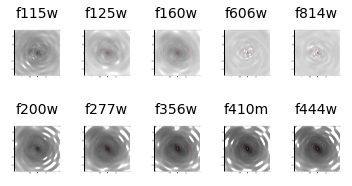

In [24]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

# List of filters and corresponding image filenames
filters = ['f115w', 'f125w', 'f160w', 'f606w', 'f814w', 'f200w', 'f277w', 'f356w', 'f410m', 'f444w']
image_paths = [f'expand({filter_name})_23205.png' for filter_name in filters]

# Create a figure and a grid of subplots with 2 rows and 5 columns (10 filters in total)
fig, axes = plt.subplots(nrows=2, ncols=5, figsize=(5, 3), facecolor='white')

# Flatten the axes array for easy iteration
axes = axes.flatten()

# Loop through each filter and corresponding image path
for i, (filter_name, image_path) in enumerate(zip(filters, image_paths)):
    
    # Read the image
    img = mpimg.imread(image_path)
    
    # Display the image 
    axes[i].imshow(img)
    
    # Add a title that includes the filter name
    axes[i].set_title(filter_name, fontsize = 14)
    
    # Remove axis ticks 
    axes[i].axis('off')

# Adjust the layout so that titles don't overlap
plt.tight_layout()

plt.savefig('Paper_Grid.png', dpi = 600)

# Show the plot
plt.show()

# Discussion Section: Conc vs Asymmetry Plot

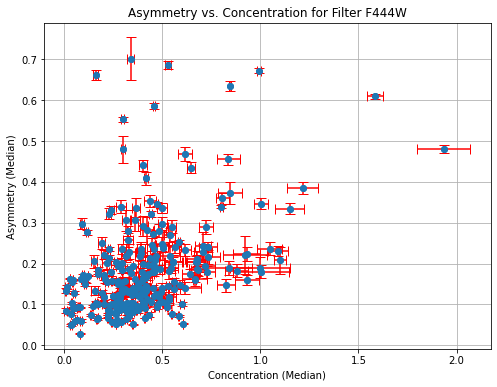

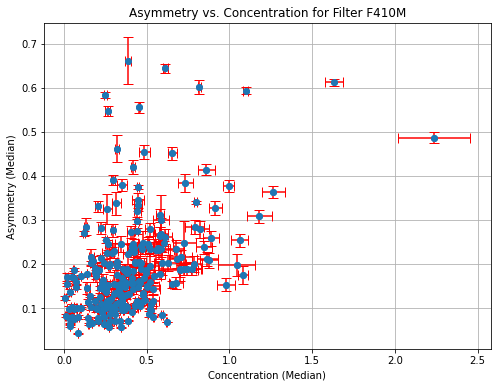

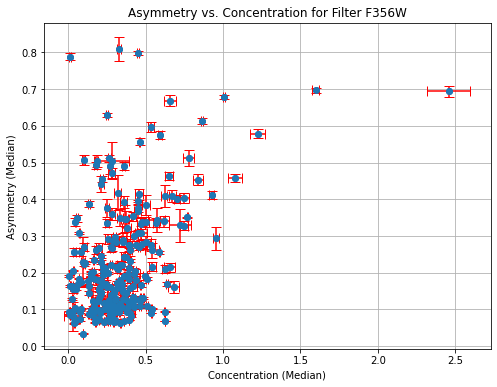

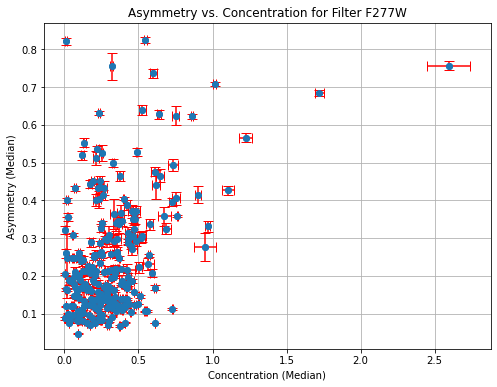

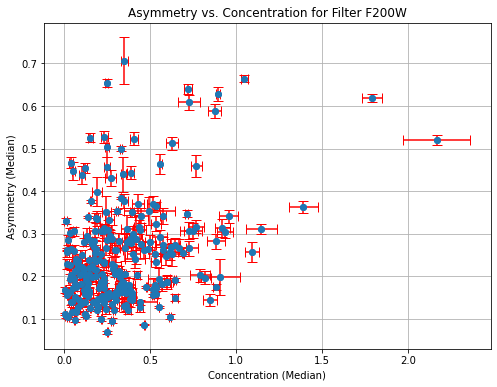

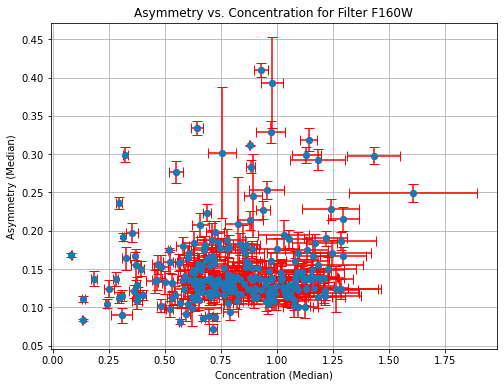

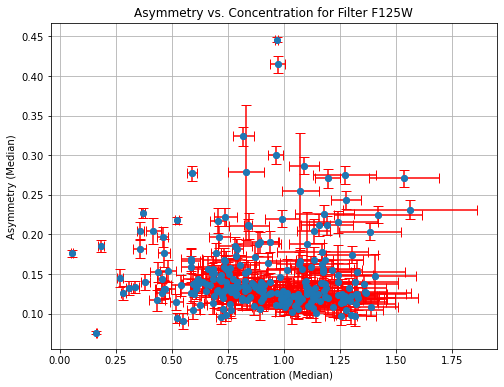

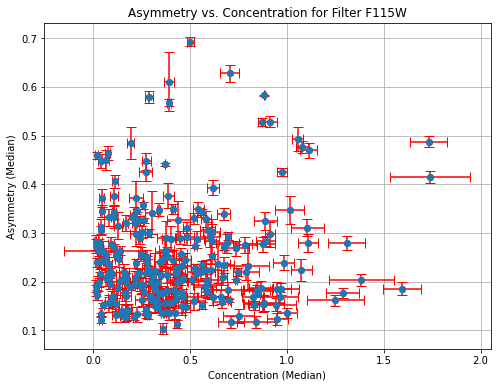

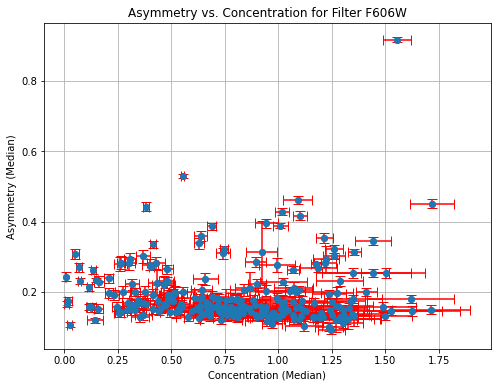

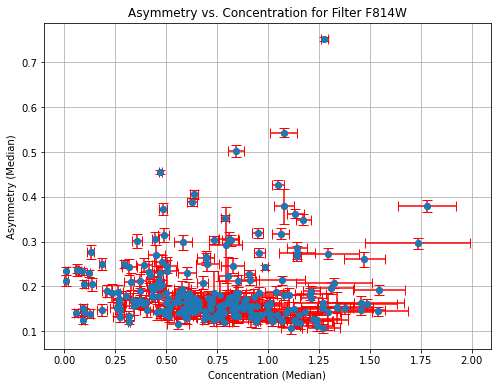

In [25]:
import numpy as np
import h5py
import matplotlib.pyplot as plt
import csv

# Function to calculate A_m and A_0 for a given m
def calculate_amplitudes(coscoefs, sincoefs, nmin, nmax, m):
    A_m = np.sqrt(np.sum(coscoefs[m, nmin:nmax+1]**2 + sincoefs[m, nmin:nmax+1]**2))
    A_0 = np.sqrt(np.sum(coscoefs[0, nmin:nmax+1]**2 + sincoefs[0, nmin:nmax+1]**2))
    return A_m, A_0

# Function to calculate asymmetry
def calculate_asymmetry(coscoefs, sincoefs, nmin, nmax):
    A_m, A_0 = calculate_amplitudes(coscoefs, sincoefs, nmin, nmax, 1)
    return A_m / A_0

# Function to calculate concentration
def calculate_concentration(coscoefs):
    c01, c00 = coscoefs[0][1], coscoefs[0][0]
    return abs(c01 / c00)

def extract_rest_frame_wavelengths(galaxy_id, csv_file):
    """Extract rest frame wavelengths for a given galaxy ID."""
    rest_frame_wavelengths = {}
    with open(csv_file, mode='r') as file:
        reader = csv.reader(file)
        next(reader)
        for row in reader:
            if int(row[0]) == galaxy_id:
                rest_frame_wavelengths = {filters[i]: float(row[2 + i]) for i in range(len(filters))}
                break
    return rest_frame_wavelengths

# Filter Names (JWST + HST)
filters = ['F444W', 'F410M', 'F356W', 'F277W', 'F200W', 'F160W', 'F125W', 'F115W', 'F606W', 'F814W']

csv_file = 'galaxies_rest_frame_wavelength.csv'

nmin = 0
nmax = 24
num_realizations = 100

# Initialize a dictionary to hold the results for each galaxy
all_galaxy_results = {}

# Loop through each galaxy ID
for galaxy_id in galaxy_ids:
    file_path = f"{galaxy_id:05d}_error.hdf5"

    asymmetry_values = {filter_name: [] for filter_name in filters}
    concentration_values = {filter_name: [] for filter_name in filters}
    
    try:
        with h5py.File(file_path, 'r') as f:
            for filter_name in filters:
                key = filter_name.lower()
                coscoefs = f[f'{key}/{galaxy_id}/expansion/coscoefs'][:]
                sincoefs = f[f'{key}/{galaxy_id}/expansion/sincoefs'][:]

                for realization in range(num_realizations):
                    coscoefs_realization = coscoefs[:, :, realization]
                    sincoefs_realization = sincoefs[:, :, realization]
                    
                    # Calculate asymmetry and concentration for each realization
                    asymmetry = calculate_asymmetry(coscoefs_realization, sincoefs_realization, nmin, nmax)
                    asymmetry_values[filter_name].append(asymmetry)

                    concentration = calculate_concentration(coscoefs_realization)
                    concentration_values[filter_name].append(concentration)
                    
        # Calculating median and uncertainty for each filter (for both asymmetry and concentration)
        median_uncertainty_asymm = {}
        median_uncertainty_conc = {}

        for filter_name in filters:
            
            # For asymmetry
            asymm_values = asymmetry_values[filter_name]
            asymm_median = np.median(asymm_values)
            asymm_uncertainty = np.std(asymm_values)
            median_uncertainty_asymm[filter_name] = (asymm_median, asymm_uncertainty)
            
            # For concentration
            conc_values = concentration_values[filter_name]
            conc_median = np.median(conc_values)
            conc_uncertainty = np.std(conc_values)
            median_uncertainty_conc[filter_name] = (conc_median, conc_uncertainty)

        # Store the results for the current galaxy
        all_galaxy_results[galaxy_id] = {
            'asymmetry': median_uncertainty_asymm,
            'concentration': median_uncertainty_conc
        }

    except Exception as e:
        print(f"Error processing galaxy ID {galaxy_id}: {e}")

# Plotting asymmetry vs. concentration for each filter
for filter_name in filters:
    asymmetry_data = []
    concentration_data = []
    
    for galaxy_id, results in all_galaxy_results.items():
        asymmetry_median = results['asymmetry'][filter_name][0]
        concentration_median = results['concentration'][filter_name][0]
        asymmetry_data.append(asymmetry_median)
        concentration_data.append(concentration_median)

    # Plot the data for this filter
    plt.figure(figsize=(8, 6))
    plt.scatter(concentration_data, asymmetry_data)
    plt.errorbar(concentration_data, asymmetry_data, 
                 xerr=[results['concentration'][filter_name][1] for galaxy_id, results in all_galaxy_results.items()],
                 yerr=[results['asymmetry'][filter_name][1] for galaxy_id, results in all_galaxy_results.items()],
                 fmt='o', ecolor='red', capsize=5)
    plt.xlabel('Concentration (Median)')
    plt.ylabel('Asymmetry (Median)')
    plt.title(f'Asymmetry vs. Concentration for Filter {filter_name}')
    plt.grid(True)
    plt.show()


252


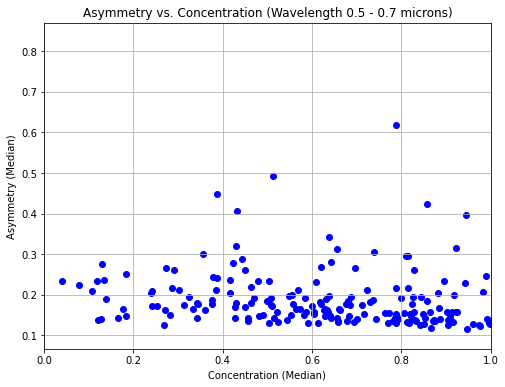

In [26]:
import numpy as np
import h5py
import matplotlib.pyplot as plt
import csv

# Function to calculate A_m and A_0 for a given m
def calculate_amplitudes(coscoefs, sincoefs, nmin, nmax, m):
    A_m = np.sqrt(np.sum(coscoefs[m, nmin:nmax+1]**2 + sincoefs[m, nmin:nmax+1]**2))
    A_0 = np.sqrt(np.sum(coscoefs[0, nmin:nmax+1]**2 + sincoefs[0, nmin:nmax+1]**2))
    return A_m, A_0

# Function to calculate asymmetry
def calculate_asymmetry(coscoefs, sincoefs, nmin, nmax):
    A_m, A_0 = calculate_amplitudes(coscoefs, sincoefs, nmin, nmax, 1)
    return A_m / A_0

# Function to calculate concentration
def calculate_concentration(coscoefs):
    c01, c00 = coscoefs[0][1], coscoefs[0][0]
    return abs(c01 / c00)

def extract_rest_frame_wavelengths(galaxy_id, csv_file):
    """Extract rest frame wavelengths for a given galaxy ID."""
    rest_frame_wavelengths = {}
    with open(csv_file, mode='r') as file:
        reader = csv.reader(file)
        next(reader)  
        for row in reader:
            if int(row[0]) == galaxy_id:
                rest_frame_wavelengths = {filters[i]: float(row[2 + i]) for i in range(len(filters))}
                break
    return rest_frame_wavelengths

# Filter Names (JWST + HST)
filters = ['F444W', 'F410M', 'F356W', 'F277W', 'F200W', 'F160W', 'F125W', 'F115W', 'F606W', 'F814W']

csv_file = 'galaxies_rest_frame_wavelength.csv'

nmin = 0
nmax = 24
num_realizations = 100

# Initialize a dictionary to hold the results for each galaxy
all_galaxy_results = {}

# Loop through each galaxy ID
for galaxy_id in galaxy_ids:
    file_path = f"{galaxy_id:05d}_error.hdf5"

    asymmetry_values = {filter_name: [] for filter_name in filters}
    concentration_values = {filter_name: [] for filter_name in filters}
    
    # Extract rest frame wavelengths for the current galaxy
    rest_frame_wavelengths = extract_rest_frame_wavelengths(galaxy_id, csv_file)
    
    try:
        with h5py.File(file_path, 'r') as f:
            for filter_name in filters:
                key = filter_name.lower()
                coscoefs = f[f'{key}/{galaxy_id}/expansion/coscoefs'][:]
                sincoefs = f[f'{key}/{galaxy_id}/expansion/sincoefs'][:]

                for realization in range(num_realizations):
                    coscoefs_realization = coscoefs[:, :, realization]
                    sincoefs_realization = sincoefs[:, :, realization]
                    
                    # Calculate asymmetry and concentration for each realization
                    asymmetry = calculate_asymmetry(coscoefs_realization, sincoefs_realization, nmin, nmax)
                    asymmetry_values[filter_name].append(asymmetry)

                    concentration = calculate_concentration(coscoefs_realization)
                    concentration_values[filter_name].append(concentration)
                    
        # Calculating median and uncertainty for each filter (for both asymmetry and concentration)
        median_uncertainty_asymm = {}
        median_uncertainty_conc = {}

        for filter_name in filters:
            # For asymmetry
            asymm_values = asymmetry_values[filter_name]
            asymm_median = np.median(asymm_values)
            asymm_uncertainty = np.std(asymm_values)
            median_uncertainty_asymm[filter_name] = (asymm_median, asymm_uncertainty)
            
            # For concentration
            conc_values = concentration_values[filter_name]
            conc_median = np.median(conc_values)
            conc_uncertainty = np.std(conc_values)
            median_uncertainty_conc[filter_name] = (conc_median, conc_uncertainty)

        # Store the results for the current galaxy
        all_galaxy_results[galaxy_id] = {
            'asymmetry': median_uncertainty_asymm,
            'concentration': median_uncertainty_conc,
            'rest_frame_wavelengths': rest_frame_wavelengths  
        }

    except Exception as e:
        print(f"Error processing galaxy ID {galaxy_id}: {e}")

# Initialize dictionaries to hold values for each galaxy
galaxy_asymmetry = {}
galaxy_concentration = {}

# Loop through each galaxy ID to collect data
for galaxy_id, results in all_galaxy_results.items():
    for filter_name in filters:
        
        # Check if the rest frame wavelength is within the desired range
        wavelength = results['rest_frame_wavelengths'].get(filter_name, None)
        if wavelength and 0.2 <= wavelength <= 0.4:  
            asymmetry_median = results['asymmetry'][filter_name][0]
            concentration_median = results['concentration'][filter_name][0]
            
            # Store values in dictionaries, appending if they already exist
            if galaxy_id not in galaxy_asymmetry:
                galaxy_asymmetry[galaxy_id] = []
                galaxy_concentration[galaxy_id] = []
                
            galaxy_asymmetry[galaxy_id].append(asymmetry_median)
            galaxy_concentration[galaxy_id].append(concentration_median)

# Calculate the median for each galaxy
final_asymmetry_data = []
final_concentration_data = []

for galaxy_id in galaxy_asymmetry.keys():
    final_asymmetry_data.append(np.median(galaxy_asymmetry[galaxy_id]))
    final_concentration_data.append(np.median(galaxy_concentration[galaxy_id]))

print(len(final_concentration_data))

# Plotting all data together
if final_asymmetry_data and final_concentration_data:
    plt.figure(figsize=(8, 6))
    plt.scatter(final_concentration_data, final_asymmetry_data, color='blue')
    plt.ylabel('Asymmetry (Median)')
    plt.xlabel('Concentration (Median)')
    plt.xlim(0, 1.0)
    plt.title('Asymmetry vs. Concentration (Wavelength 0.5 - 0.7 microns)')
    plt.grid(True)
    plt.show()


# Uncertainty determination

Median nmax: 12.0, Standard deviation: 7.000764962428862


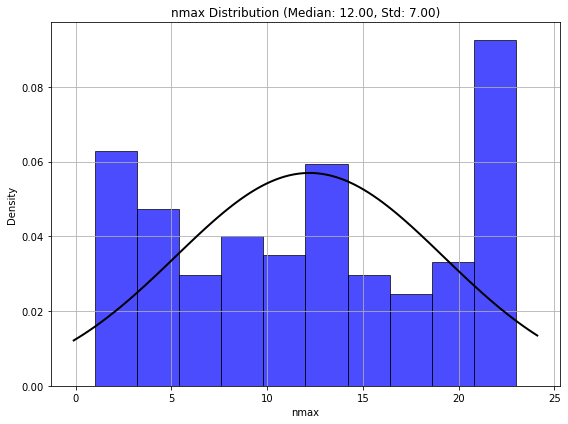

In [27]:
import numpy as np
import h5py
import matplotlib.pyplot as plt
from scipy.stats import norm

# Function to calculate A_m and A_0 for a given m
def calculate_amplitudes(coscoefs, sincoefs, nmin, nmax, m):
    A_m = np.sqrt(np.sum(coscoefs[m, nmin:nmax+1]**2 + sincoefs[m, nmin:nmax+1]**2))
    A_0 = np.sqrt(np.sum(coscoefs[0, nmin:nmax+1]**2 + sincoefs[0, nmin:nmax+1]**2))
    return A_m, A_0

# Function to calculate asymmetry (A1 / A0)
def calculate_asymmetry(coscoefs, sincoefs, nmin, nmax):
    A_m, A_0 = calculate_amplitudes(coscoefs, sincoefs, nmin, nmax, 1)
    return A_m / A_0

# Filter Names (JWST + HST)
filters = ['F444W', 'F410M', 'F356W', 'F277W', 'F200W', 'F160W', 'F125W', 'F115W', 'F606W', 'F814W']

nmin = 0
num_realizations = 100
chosen_realization = 1
threshold = 0.01

# Initialize a dictionary to hold the results for each galaxy
all_galaxy_results = {}
nmax_below_threshold = []

# Loop through each galaxy ID
for galaxy_id in galaxy_ids:
    file_path = f"{galaxy_id:05d}_error.hdf5"

    asymmetry_values_nmax = {filter_name: [] for filter_name in filters}

    try:
        with h5py.File(file_path, 'r') as f:
            for filter_name in filters:
                key = filter_name.lower()
                coscoefs = f[f'{key}/{galaxy_id}/expansion/coscoefs'][:]
                sincoefs = f[f'{key}/{galaxy_id}/expansion/sincoefs'][:]

                coscoefs_realization = coscoefs[:, :, chosen_realization]
                sincoefs_realization = sincoefs[:, :, chosen_realization]

                # Loop over nmax values from 1 to 24
                for nmax in range(1, 25):
                    asymmetry = calculate_asymmetry(coscoefs_realization, sincoefs_realization, nmin, nmax)
                    asymmetry_values_nmax[filter_name].append(asymmetry)

        # Store the results for the current galaxy
        all_galaxy_results[galaxy_id] = asymmetry_values_nmax

        # Plot the results for one filter, e.g., F444W
        filter_to_plot = 'F444W'
        nmax_values = range(1, 25)
        asymmetry_nmax = asymmetry_values_nmax[filter_to_plot]

        # Get the asymmetry value at nmax = 24
        asymmetry_nmax_24 = asymmetry_nmax[-1]

        # Check when asymmetry difference is less than threshold (0.01)
        for nmax, asymmetry in zip(nmax_values, asymmetry_nmax):
            if abs(asymmetry - asymmetry_nmax_24) < threshold:
                nmax_below_threshold.append(nmax)  # Track nmax values that satisfy the threshold condition
                break

    except Exception as e:
        print(f"Error processing galaxy ID {galaxy_id}: {e}")

# Calculate median and standard deviation of nmax values across galaxies
if nmax_below_threshold:
    median_nmax = np.median(nmax_below_threshold)
    std_nmax = np.std(nmax_below_threshold)
    
    print(f"Median nmax: {median_nmax}, Standard deviation: {std_nmax}")

    # Plot the histogram of nmax values to check distribution
    plt.figure(figsize=(8, 6))
    plt.hist(nmax_below_threshold, bins=10, color='blue', edgecolor='black', alpha=0.7, density=True)

    # Fit a normal distribution to the data
    mu, std = norm.fit(nmax_below_threshold)

    # Plot the normal distribution curve
    xmin, xmax = plt.xlim()
    x = np.linspace(xmin, xmax, 100)
    p = norm.pdf(x, mu, std)
    plt.plot(x, p, 'k', linewidth=2)

    plt.title(f'nmax Distribution (Median: {median_nmax:.2f}, Std: {std_nmax:.2f})')
    plt.xlabel('nmax')
    plt.ylabel('Density')
    plt.grid(True)
    plt.tight_layout()
    plt.show()
else:
    print("No nmax values found below the threshold.")
